In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
df = pd.read_csv('2024_player_stats.csv')

In [3]:
df.head()

Player  Games Played  Games Started  Total Minutes Played  \
0   Newton, Tristen            40             40                  1328   
1      Spencer, Cam            40             40                  1312   
2     Karaban, Alex            39             39                  1224   
3  Clingan, Donovan            35             33                   788   
4   Castle, Stephon            34             30                   918   

   Average Minutes Per Game  Field Goals Made  Field Goals Attempted  \
0                      33.2               182                    439   
1                      32.8               196                    405   
2                      31.4               191                    386   
3                      22.5               186                    291   
4                      27.0               137                    290   

   Field Goals Percentage  3pts Made  3pts Attempted  ...  Total Rebounds  \
0                   0.415         71             221  ...             263   
1                   0.484         99             225  ...             194   
2                   0.495         81             214  ...             197   
3                   0.639          2               8  ...             258   
4                   0.472         20              75  ...             159   

   Average Rebounds Per Game  Personal Fouls  Assists  Turnovers  Steals  \
0                        6.6              70      248         98      37   
1                        4.9              86      145         40      59   
2                        5.1              68       57         33      34   
3                        7.4              71       53         28      18   
4                        4.7              82       99         51      27   

   Blocks   Team  Tournament Wins  Unnamed: 27  
0      12  Uconn                6          NaN  
1      10  Uconn                6          NaN  
2      33  Uconn                6          NaN  
3      86  Uconn                6          NaN  
4      18  Uconn                6          NaN  

[5 rows x 28 columns]

In [4]:
df.isna().sum()

Player                         0
Games Played                   0
Games Started                  0
Total Minutes Played           0
Average Minutes Per Game       0
Field Goals Made               0
Field Goals Attempted          0
Field Goals Percentage         0
3pts Made                      0
3pts Attempted                 0
3pts Percentage                0
Free Throws Made               0
Free Throws Attempted          0
Free Throws Percentage         0
Total Points                   0
Average Points Per Game        0
Offensive Rebounds             0
Defensive Rebounds             0
Total Rebounds                 0
Average Rebounds Per Game      0
Personal Fouls                 0
Assists                        0
Turnovers                      0
Steals                         0
Blocks                         0
Team                           0
Tournament Wins                0
Unnamed: 27                  904
dtype: int64

In [5]:
# drop players with 100% scoring percentage b/c they played 1 game, i.e. does not actually affect team
df = df[df['Field Goals Percentage'] != 1] 

In [6]:
df.head()

Player  Games Played  Games Started  Total Minutes Played  \
0   Newton, Tristen            40             40                  1328   
1      Spencer, Cam            40             40                  1312   
2     Karaban, Alex            39             39                  1224   
3  Clingan, Donovan            35             33                   788   
4   Castle, Stephon            34             30                   918   

   Average Minutes Per Game  Field Goals Made  Field Goals Attempted  \
0                      33.2               182                    439   
1                      32.8               196                    405   
2                      31.4               191                    386   
3                      22.5               186                    291   
4                      27.0               137                    290   

   Field Goals Percentage  3pts Made  3pts Attempted  ...  Total Rebounds  \
0                   0.415         71             221  ...             263   
1                   0.484         99             225  ...             194   
2                   0.495         81             214  ...             197   
3                   0.639          2               8  ...             258   
4                   0.472         20              75  ...             159   

   Average Rebounds Per Game  Personal Fouls  Assists  Turnovers  Steals  \
0                        6.6              70      248         98      37   
1                        4.9              86      145         40      59   
2                        5.1              68       57         33      34   
3                        7.4              71       53         28      18   
4                        4.7              82       99         51      27   

   Blocks   Team  Tournament Wins  Unnamed: 27  
0      12  Uconn                6          NaN  
1      10  Uconn                6          NaN  
2      33  Uconn                6          NaN  
3      86  Uconn                6          NaN  
4      18  Uconn                6          NaN  

[5 rows x 28 columns]

In [7]:
team_names=df['Team'].unique()

In [8]:
len(team_names) # sanity check

64

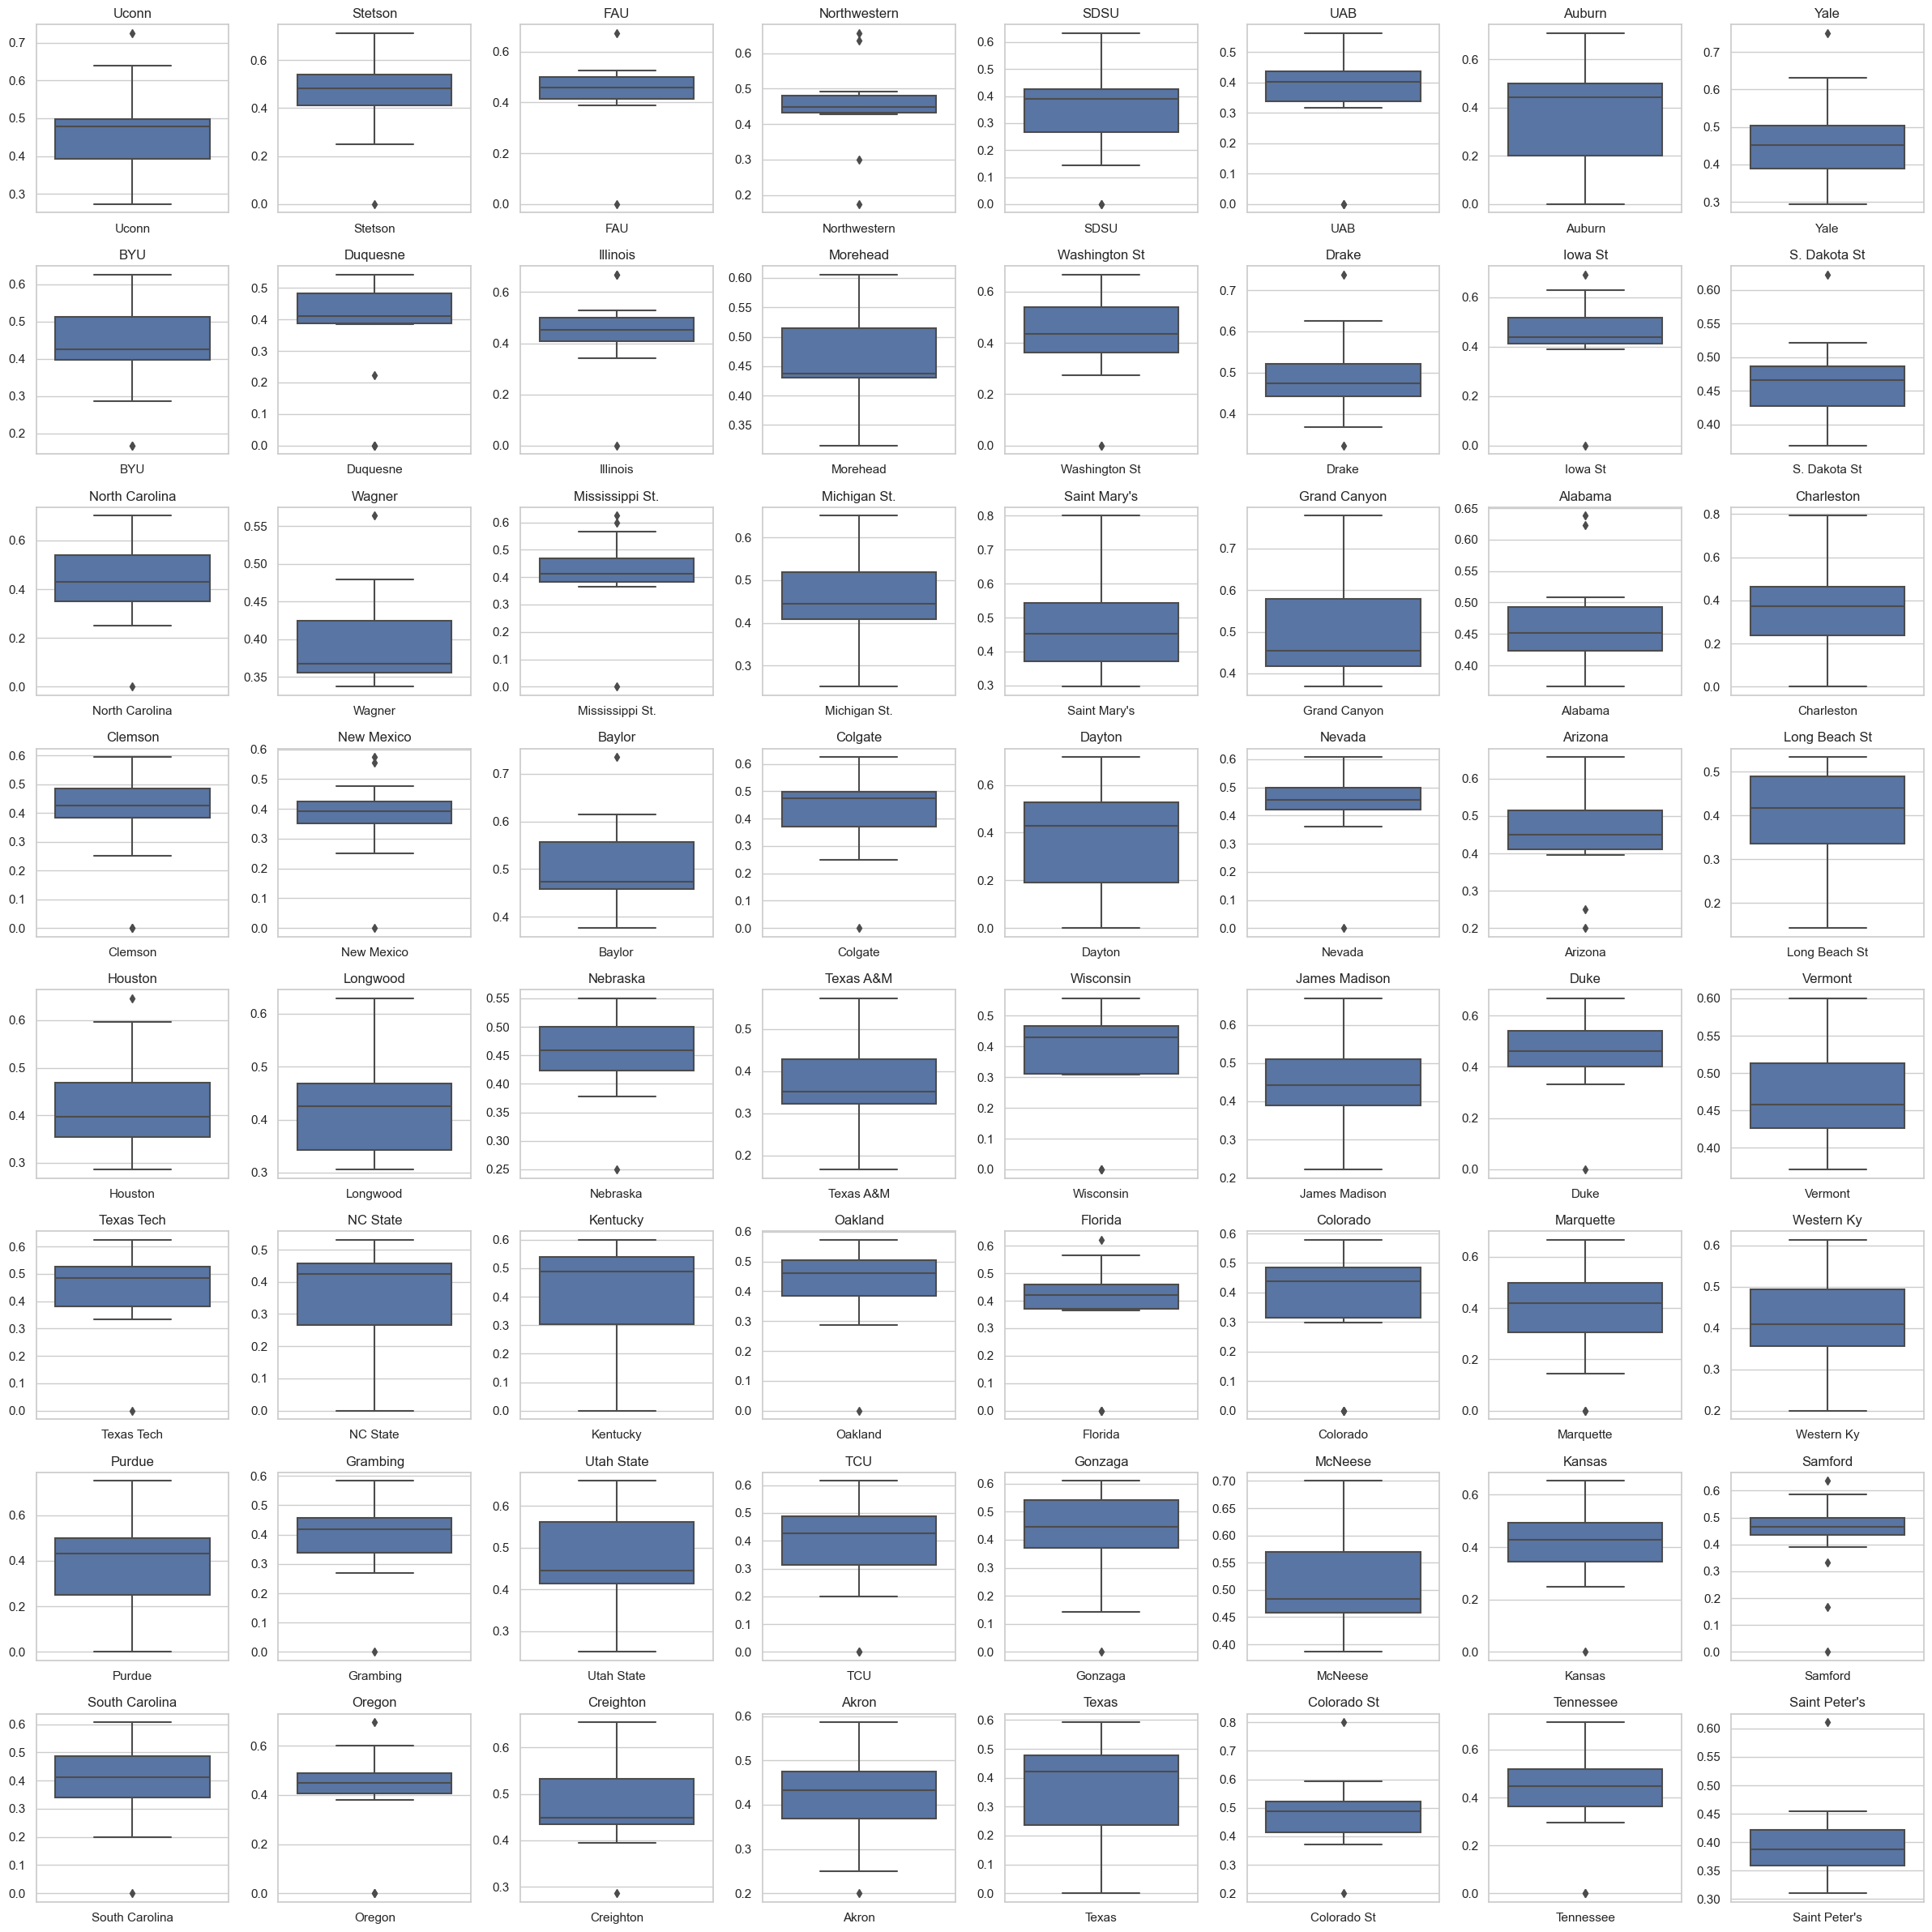

In [9]:
# Set viz
sns.set(style="whitegrid")

# Create an 8x8 grid of subplots
fig, axes = plt.subplots(8, 8, figsize=(24, 24))

# Plot the distribution of field goal % per Team
for i in range(8):
    for j in range(8):
        team = team_names[i * 8 + j]
        sns.boxplot(x='Team', y='Field Goals Percentage', data=df[df['Team'] == team], ax=axes[i, j])
        axes[i, j].set_title(team)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
# top 4 teams
top_4 = ['Uconn','Purdue','Alabama','NC State']

# df of just top 4 teams
filtered_df = df[df['Team'].isin(top_4)]

In [11]:
df.columns

Index(['Player', 'Games Played', 'Games Started', 'Total Minutes Played',
       'Average Minutes Per Game', 'Field Goals Made', 'Field Goals Attempted',
       'Field Goals Percentage', '3pts Made', '3pts Attempted',
       '3pts Percentage', 'Free Throws Made', 'Free Throws Attempted',
       'Free Throws Percentage', 'Total Points', 'Average Points Per Game',
       'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds',
       'Average Rebounds Per Game', 'Personal Fouls', 'Assists', 'Turnovers',
       'Steals', 'Blocks', 'Team', 'Tournament Wins', 'Unnamed: 27'],
      dtype='object')

In [12]:
stats = ['Field Goals Attempted',
       'Field Goals Percentage','3pts Attempted',
       '3pts Percentage','Free Throws Attempted',
       'Free Throws Percentage','Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds',
       'Average Rebounds Per Game', 'Personal Fouls', 'Assists', 'Turnovers',
       'Steals', 'Blocks']

In [13]:
def make_boxplots(data, teams, stats, differentiation,color):
    """
    makes boxplots showing the distribution among players per team for a certain statistic 
    (i.e. field goal percentage or defensive rebounds)
    
    
    input: data (df), teams(list), which statistics to visualize (list), differentiation (str), color (str)
    output: graph of 4 suplots(boxplots), 2x2, per statistic, each boxplot representing a different team
    
    """
    
    for x in stats:
        sns.set(style="whitegrid")


        # Create a 2x2 grid of subplots
        fig, axes = plt.subplots(2, 2, figsize=(7, 7))

        # Plot the distribution of statistic for each of the top 4 teams
        for i in range(2):
            for j in range(2):
                team = teams[i * 2 + j]
                sns.boxplot(x='Team', y=x, data=data[data['Team'] == team], ax=axes[i, j],color=color)
                axes[i, j].set_title(team)
                axes[i, j].set_xlabel('')
                axes[i, j].set_ylabel('')

                fig.suptitle(f'{x} Dist. Among Players for {differentiation} Teams')
                
                # save = str(f'{x} Dist. Among Players for {differentiation} Teams')

        # Adjust layout
        plt.tight_layout()
        plt.savefig(f'{save}.png')
        plt.show()

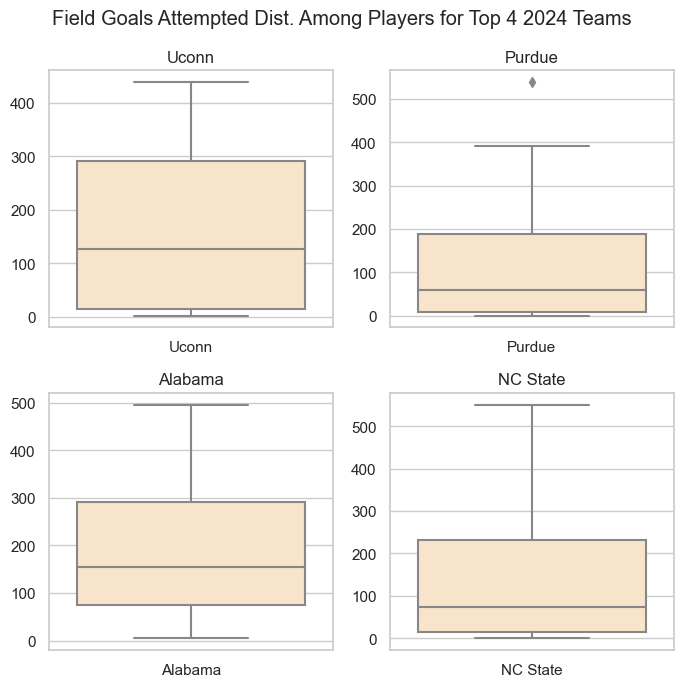

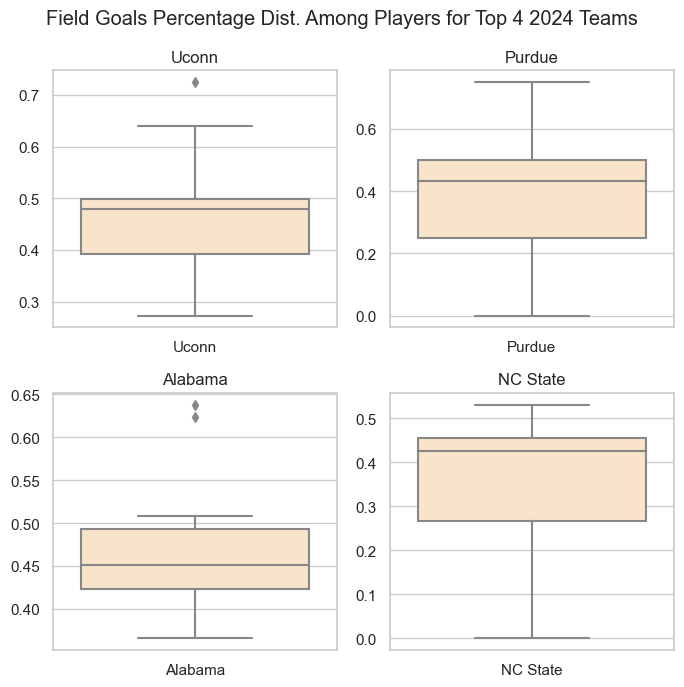

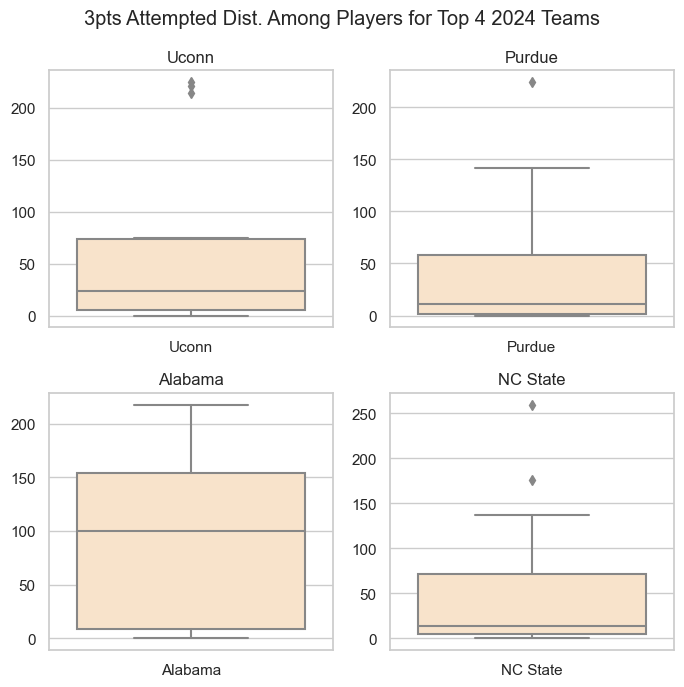

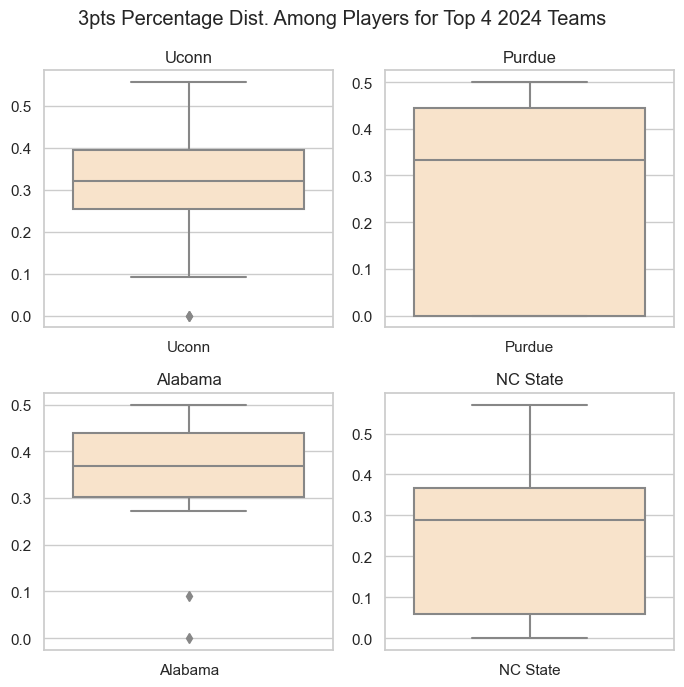

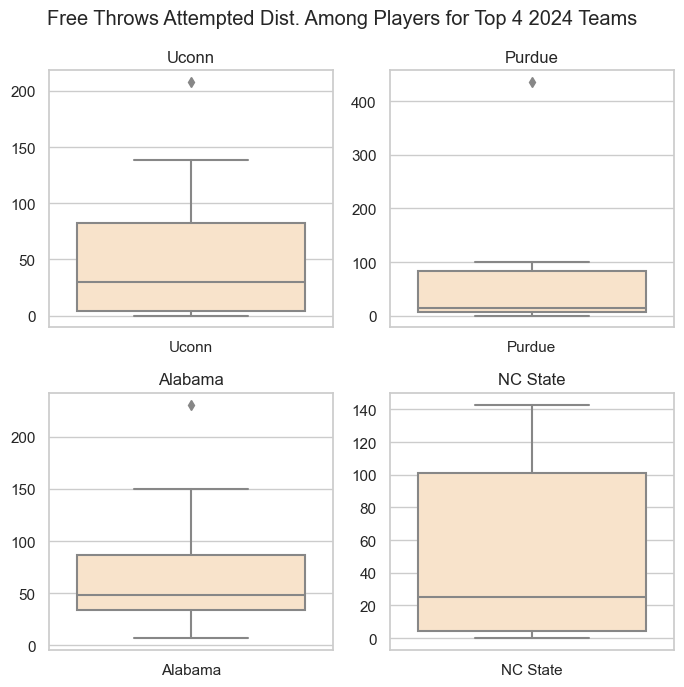

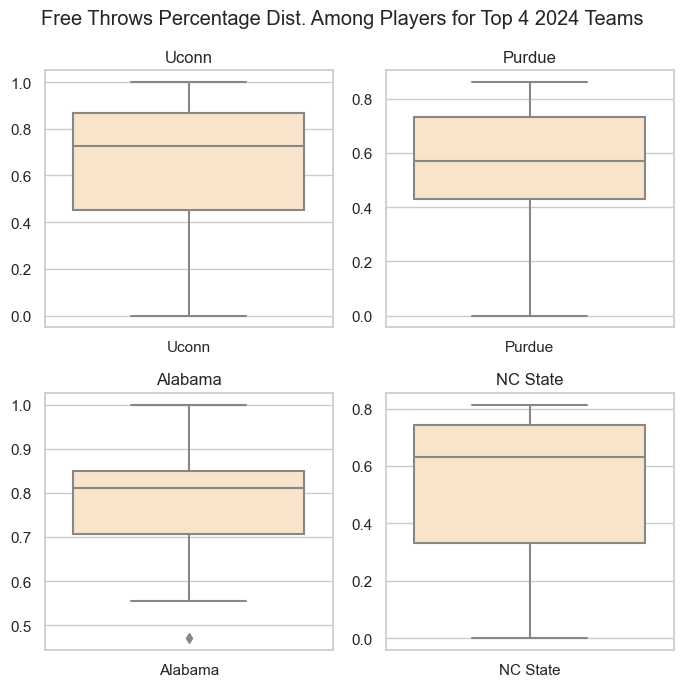

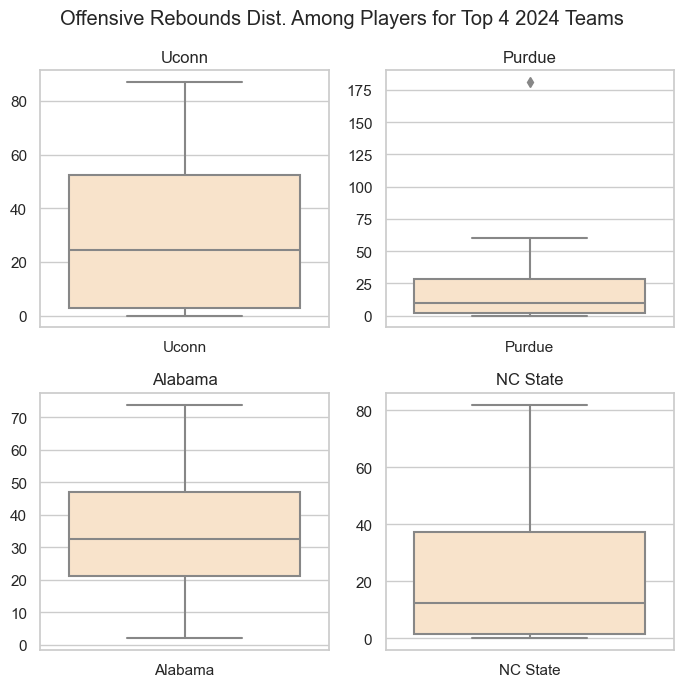

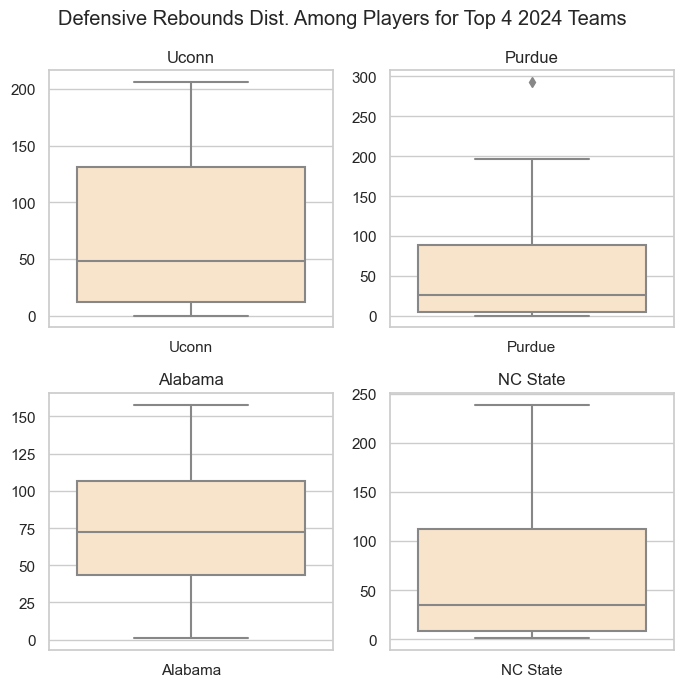

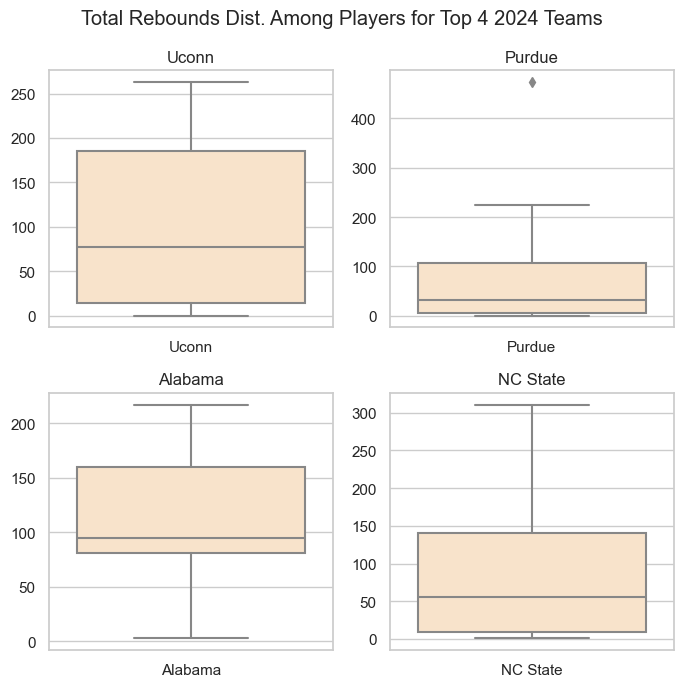

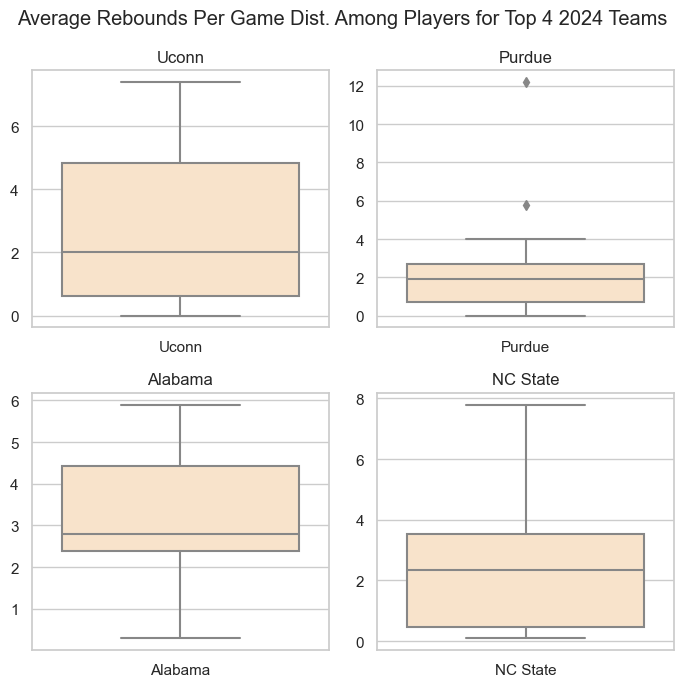

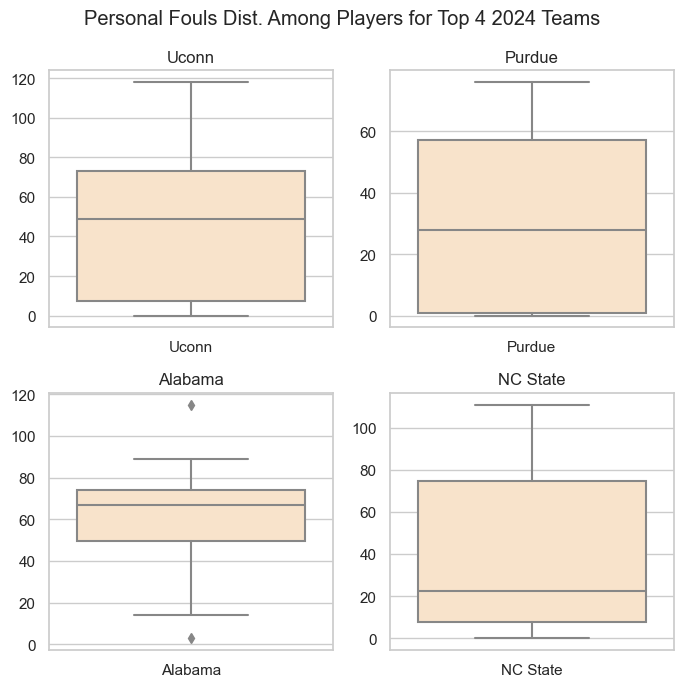

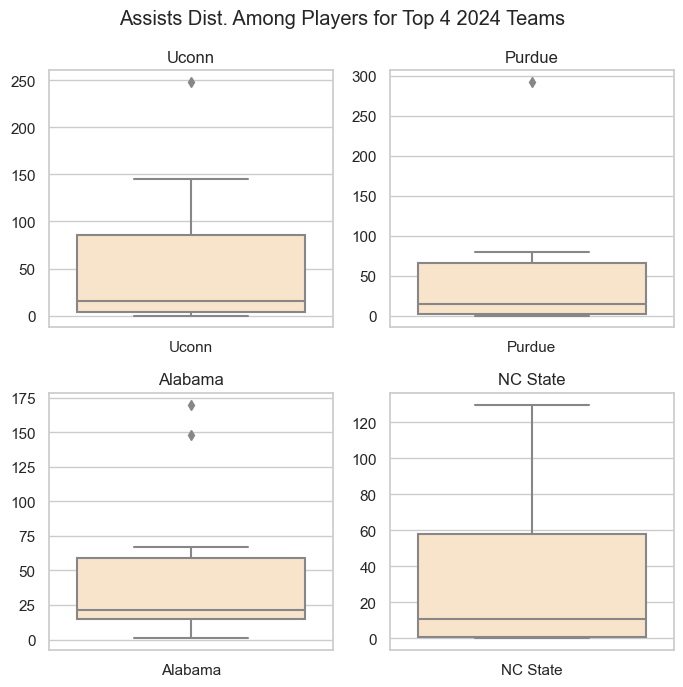

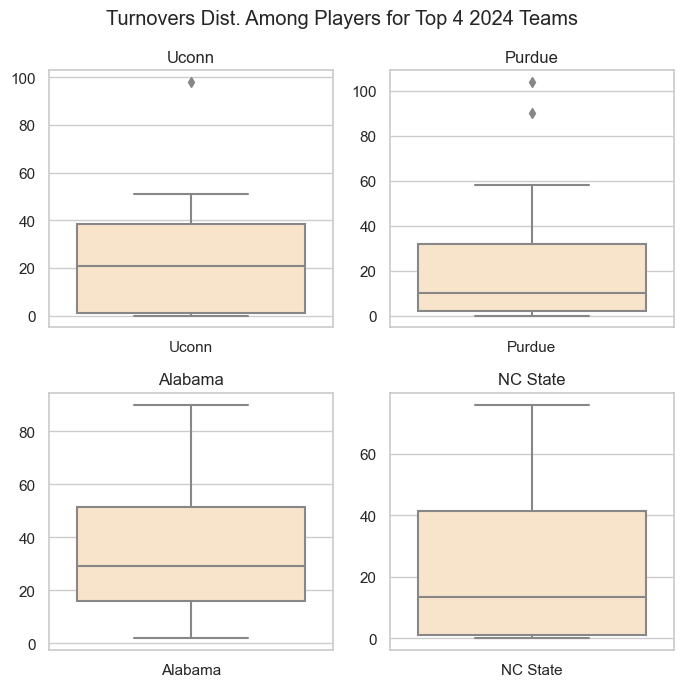

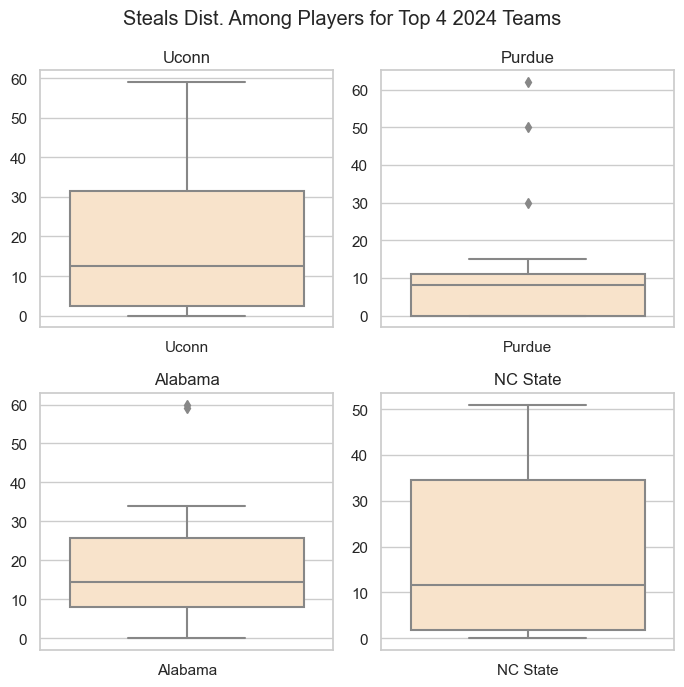

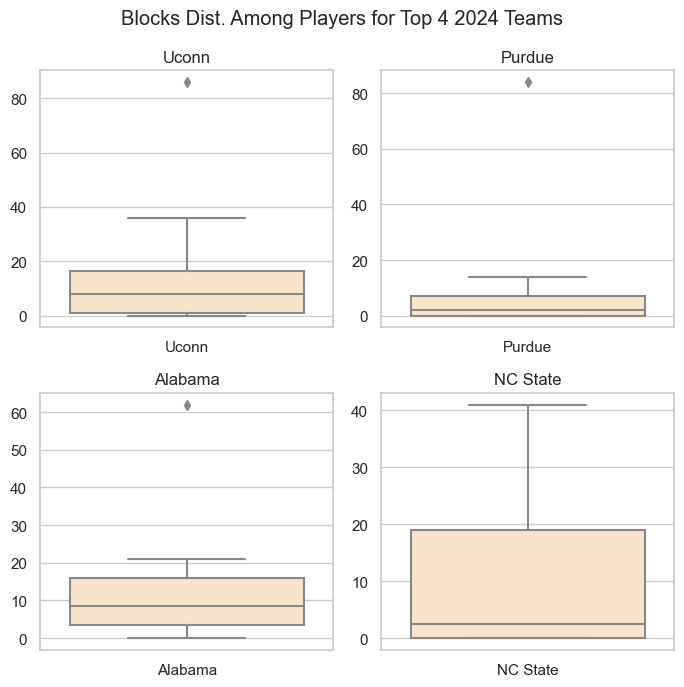

In [14]:
make_boxplots(filtered_df,top_4,stats,'Top 4 2024','bisque')

In [15]:
# four teams with high seeds that lost in the first round
# sorry about the list name, but it is true
bad_teams=['Stetson',"Saint Peter's",'Long Beach St','Longwood']

# df of just bottom teams
filtered_df_bad = df[df['Team'].isin(bad_teams)]



In [16]:
filtered_df_bad.describe()

Games Played  Games Started  Total Minutes Played  \
count     57.000000      57.000000             57.000000   
mean      25.245614      12.105263            491.228070   
std       10.912445      13.042081            396.740065   
min        1.000000       0.000000              5.000000   
25%       16.000000       0.000000            135.000000   
50%       31.000000      10.000000            449.000000   
75%       35.000000      23.000000            809.000000   
max       36.000000      35.000000           1216.000000   

       Average Minutes Per Game  Field Goals Made  Field Goals Attempted  \
count                 57.000000         57.000000              57.000000   
mean                  16.180702         63.052632             143.421053   
std                   10.399286         62.750191             139.932247   
min                    2.200000          0.000000               1.000000   
25%                    6.200000         11.000000              27.000000   
50%                   16.600000         47.000000             115.000000   
75%                   25.300000        119.000000             215.000000   
max                   34.700000        244.000000             570.000000   

       Field Goals Percentage   3pts Made  3pts Attempted  3pts Percentage  \
count               57.000000   57.000000       57.000000        57.000000   
mean                 0.422526   15.789474       46.912281         0.280825   
std                  0.120609   21.875244       59.384125         0.161652   
min                  0.000000    0.000000        0.000000         0.000000   
25%                  0.340000    2.000000        5.000000         0.222000   
50%                  0.419000    7.000000       23.000000         0.308000   
75%                  0.500000   24.000000       78.000000         0.377000   
max                  0.712000  110.000000      289.000000         0.667000   

       ...  Defensive Rebounds  Total Rebounds  Average Rebounds Per Game  \
count  ...           57.000000       57.000000                  57.000000   
mean   ...           56.666667       82.087719                   2.736842   
std    ...           55.813252       81.289008                   2.258052   
min    ...            0.000000        0.000000                   0.000000   
25%    ...           10.000000       15.000000                   0.900000   
50%    ...           48.000000       67.000000                   2.200000   
75%    ...           93.000000      140.000000                   4.100000   
max    ...          244.000000      362.000000                  10.300000   

       Personal Fouls     Assists  Turnovers     Steals     Blocks  \
count       57.000000   57.000000  57.000000  57.000000  57.000000   
mean        42.368421   31.771930  27.842105  16.684211   8.491228   
std         32.996554   43.817812  27.421830  15.991245  12.252001   
min          0.000000    0.000000   0.000000   0.000000   0.000000   
25%         15.000000    5.000000   5.000000   3.000000   1.000000   
50%         40.000000   13.000000  23.000000  12.000000   3.000000   
75%         70.000000   42.000000  43.000000  27.000000   9.000000   
max        113.000000  203.000000  99.000000  61.000000  53.000000   

       Tournament Wins  Unnamed: 27  
count             57.0          0.0  
mean               0.0          NaN  
std                0.0          NaN  
min                0.0          NaN  
25%                0.0          NaN  
50%                0.0          NaN  
75%                0.0          NaN  
max                0.0          NaN  

[8 rows x 26 columns]

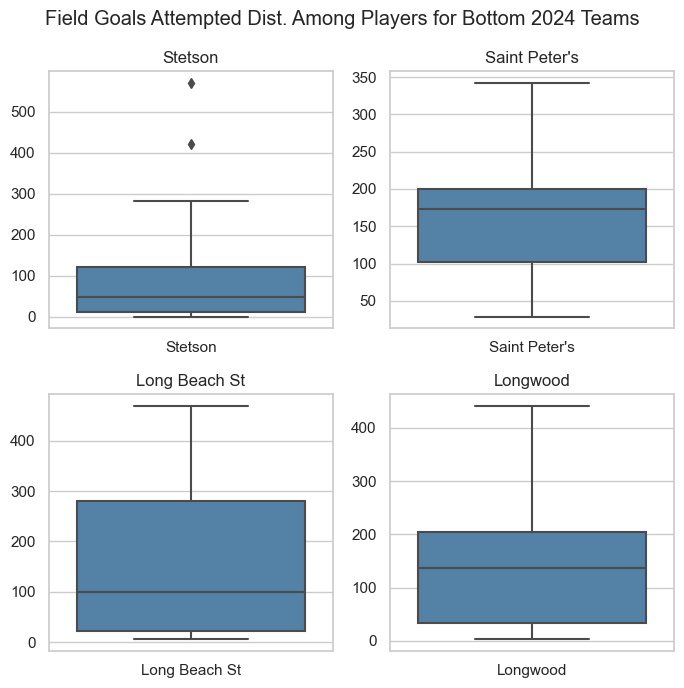

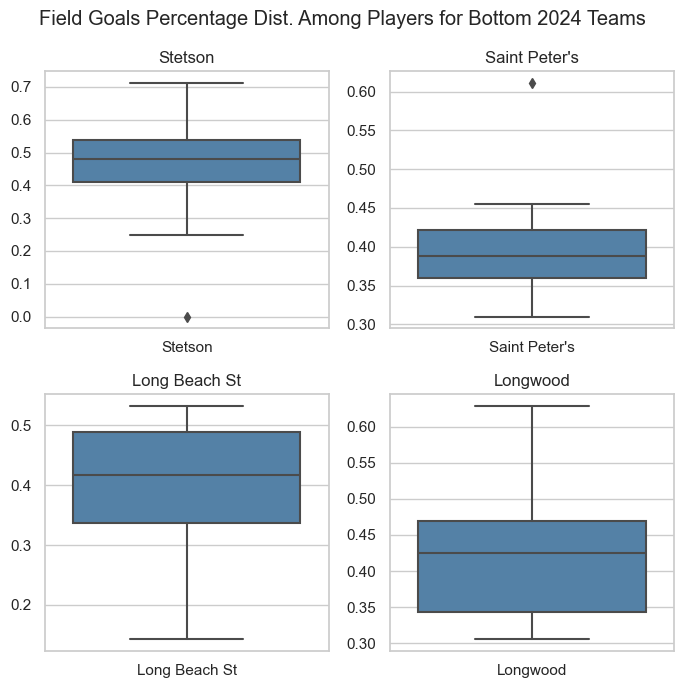

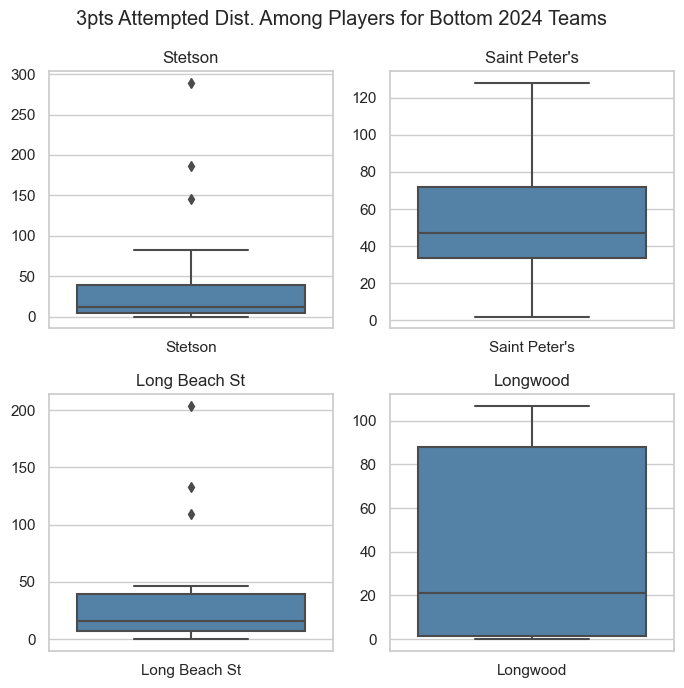

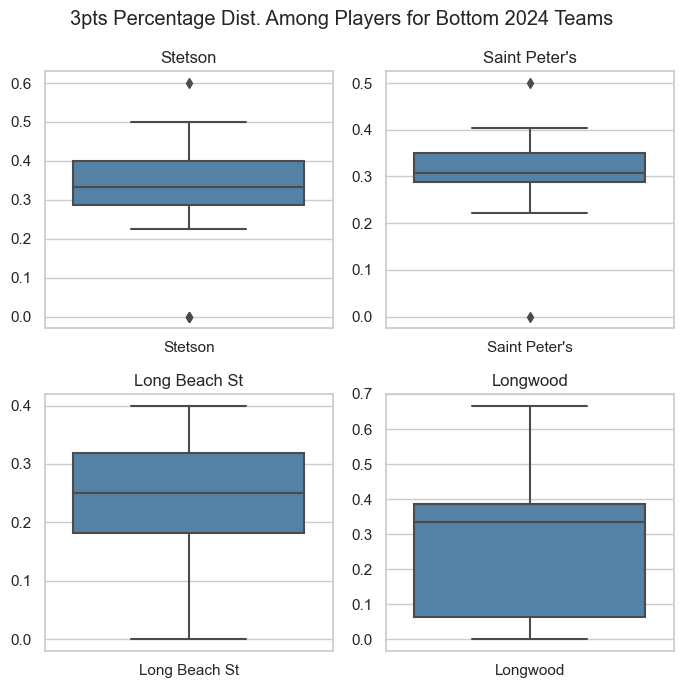

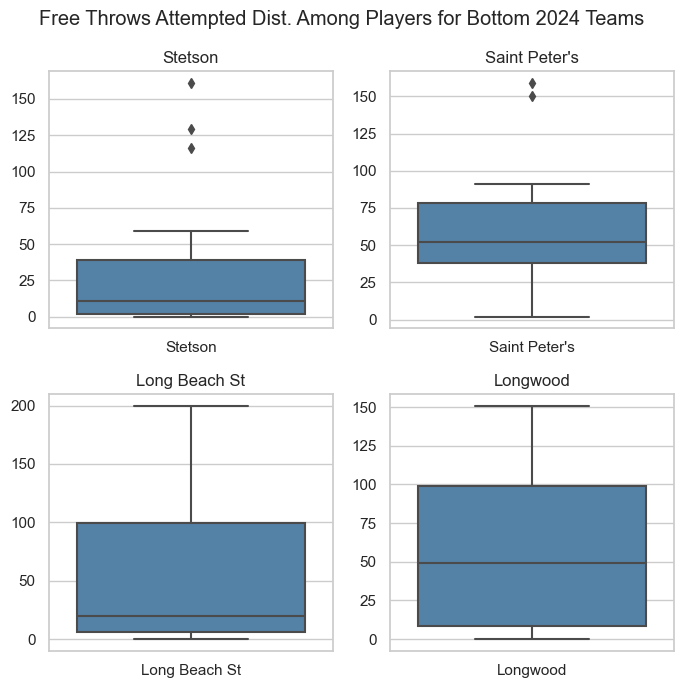

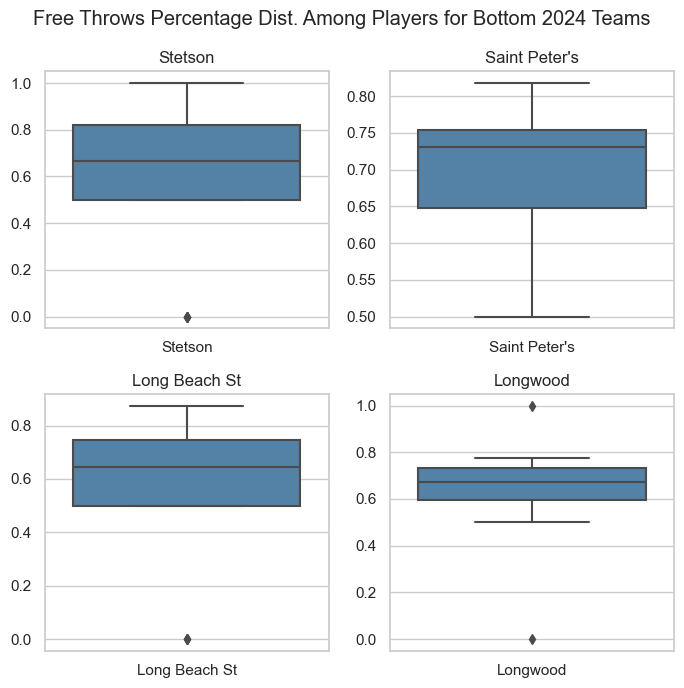

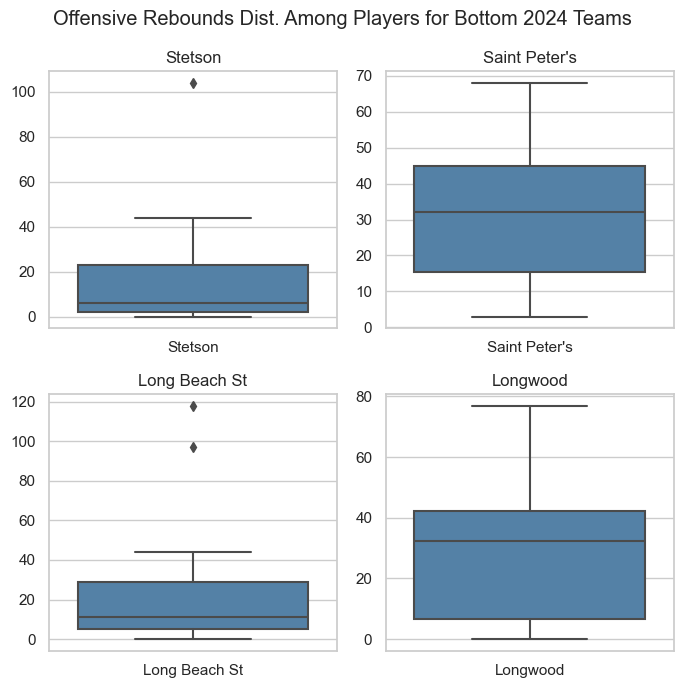

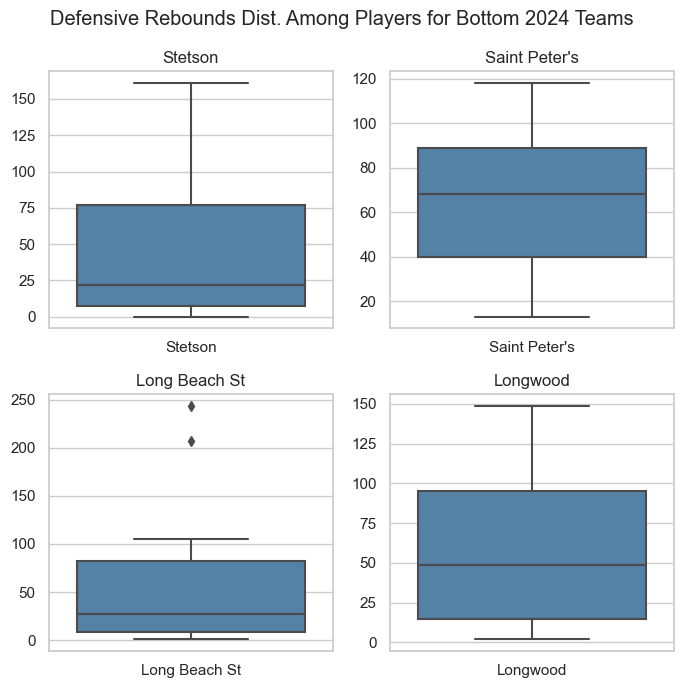

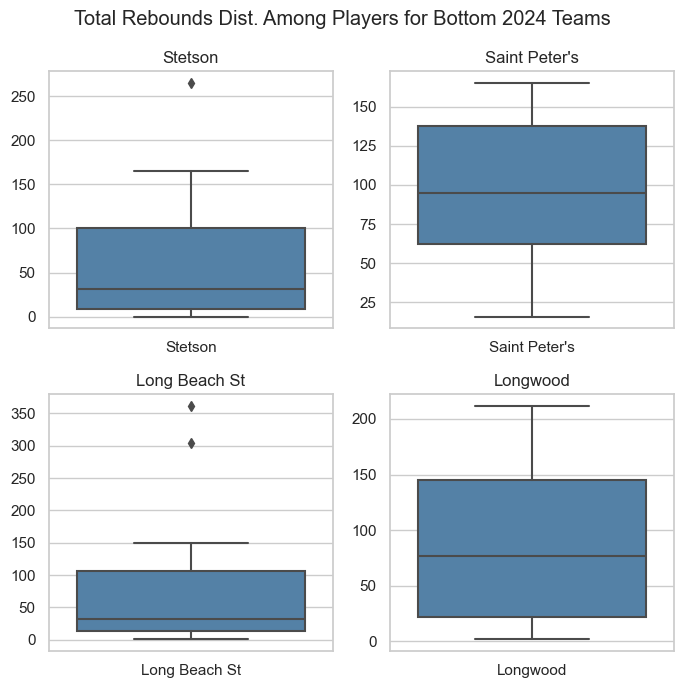

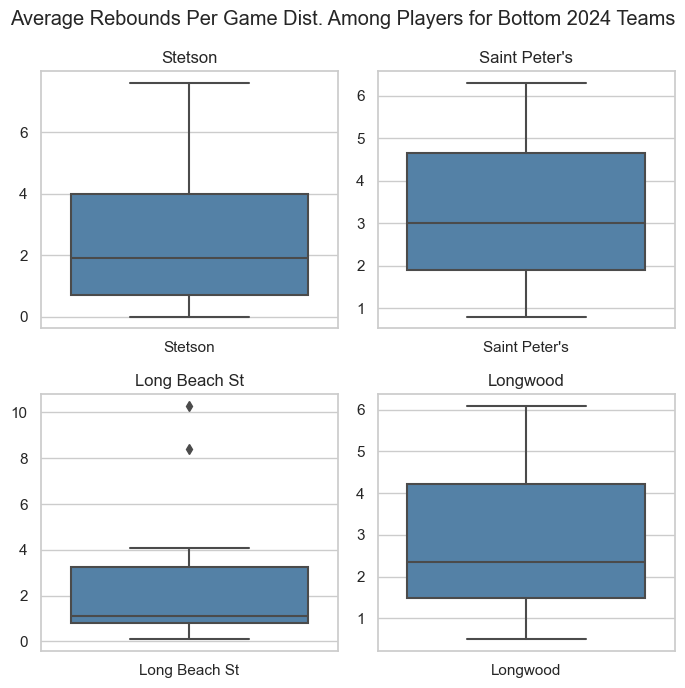

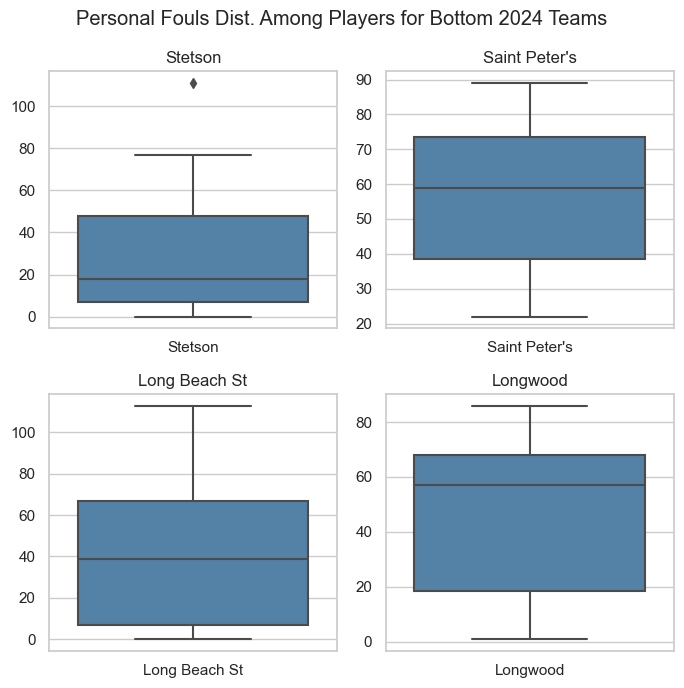

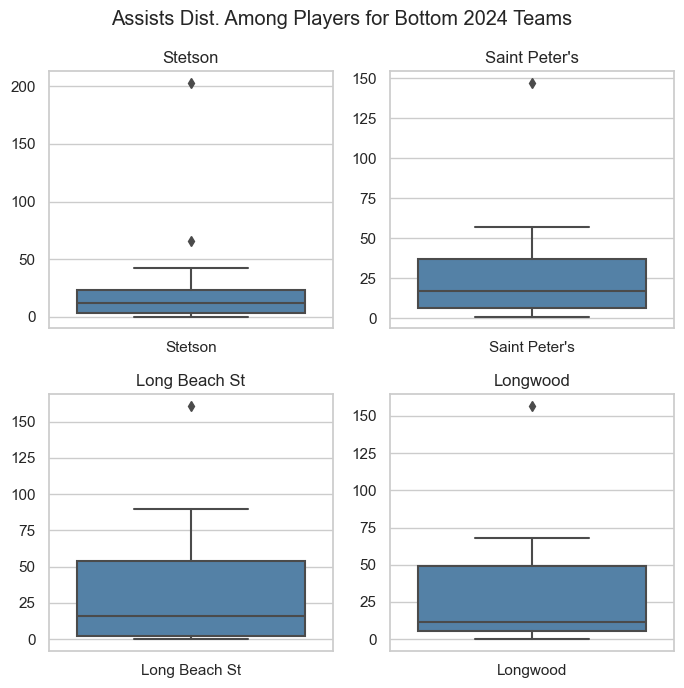

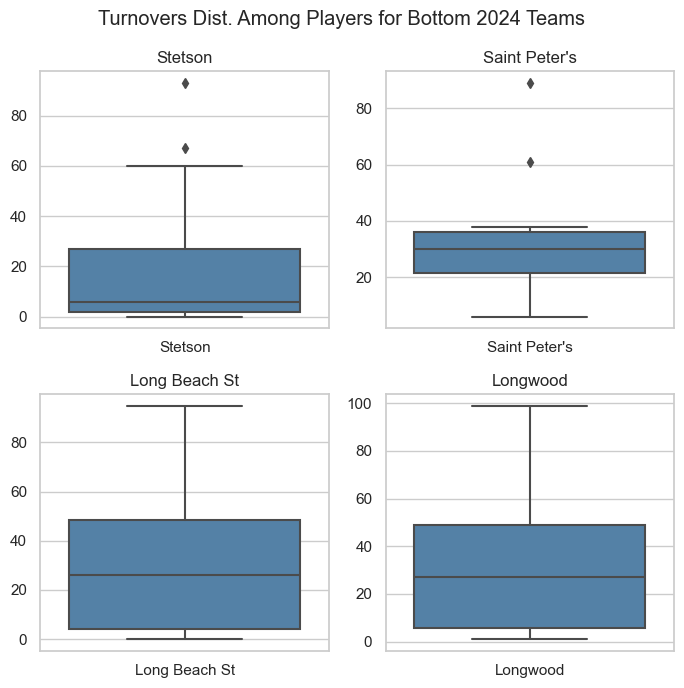

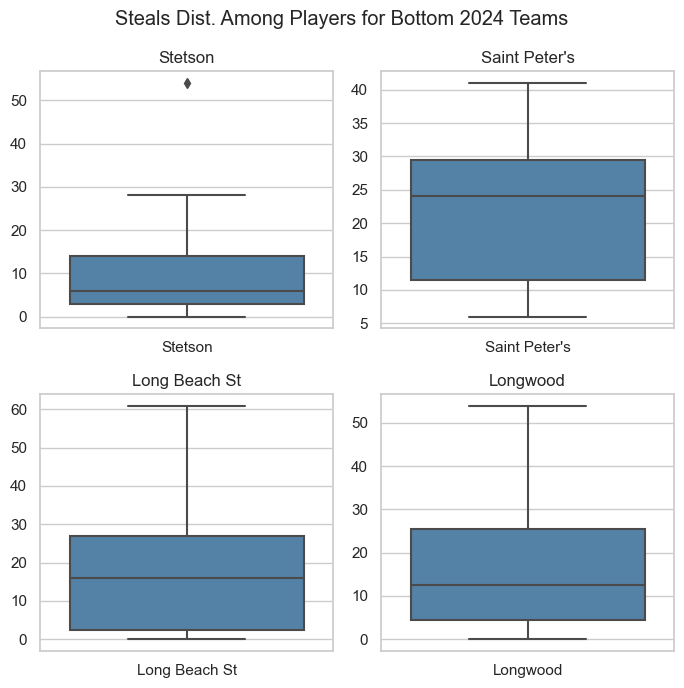

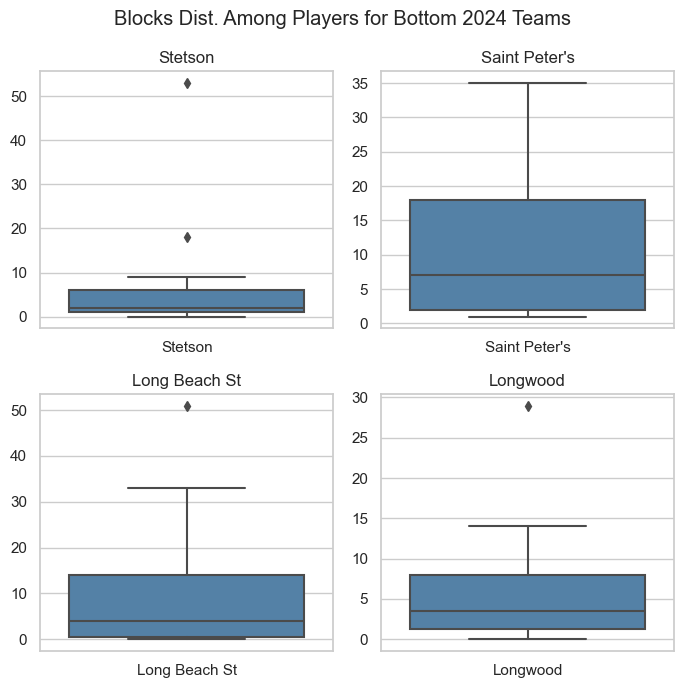

In [17]:
make_boxplots(filtered_df_bad,bad_teams,stats,'Bottom 2024','steelblue')

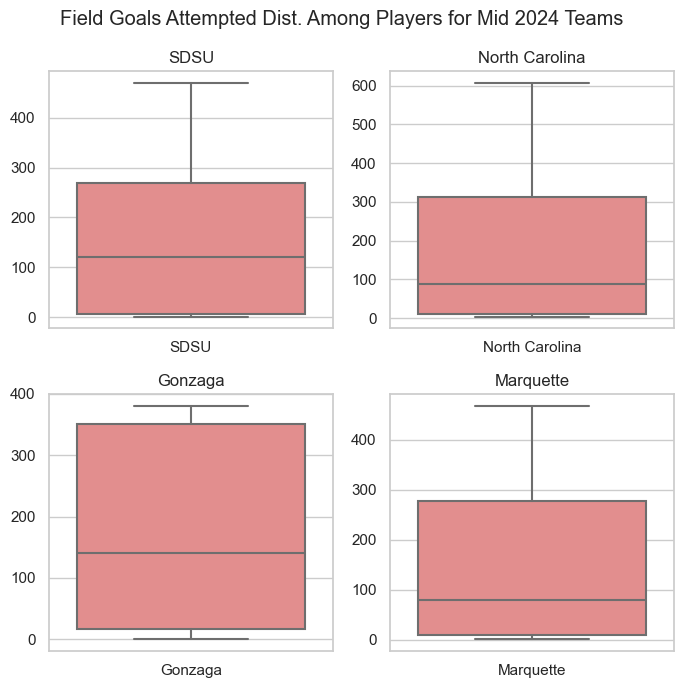

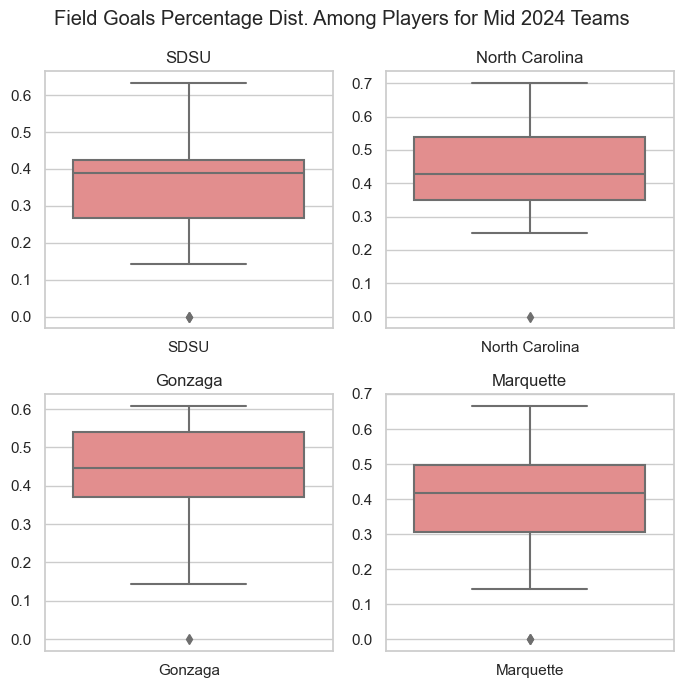

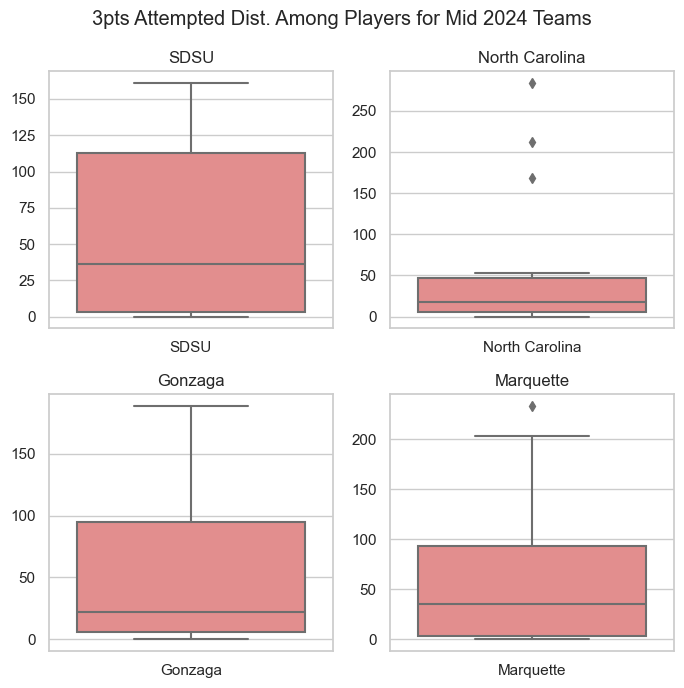

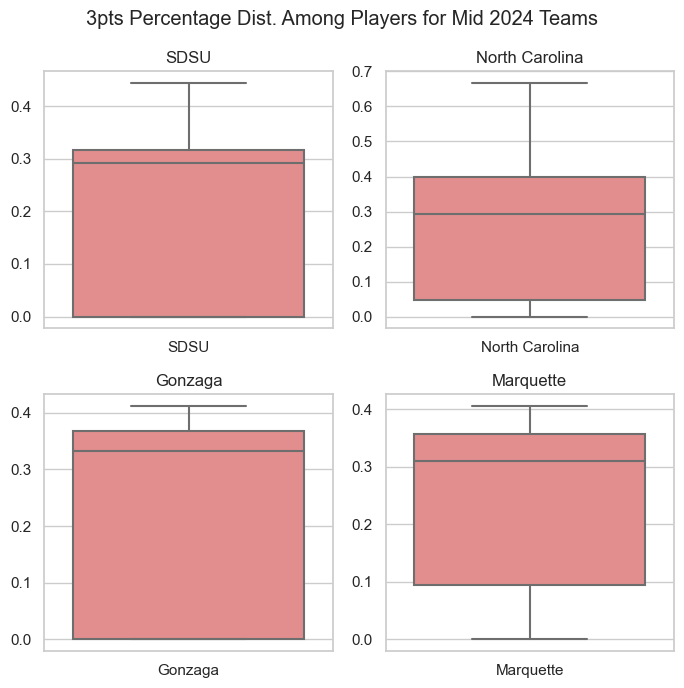

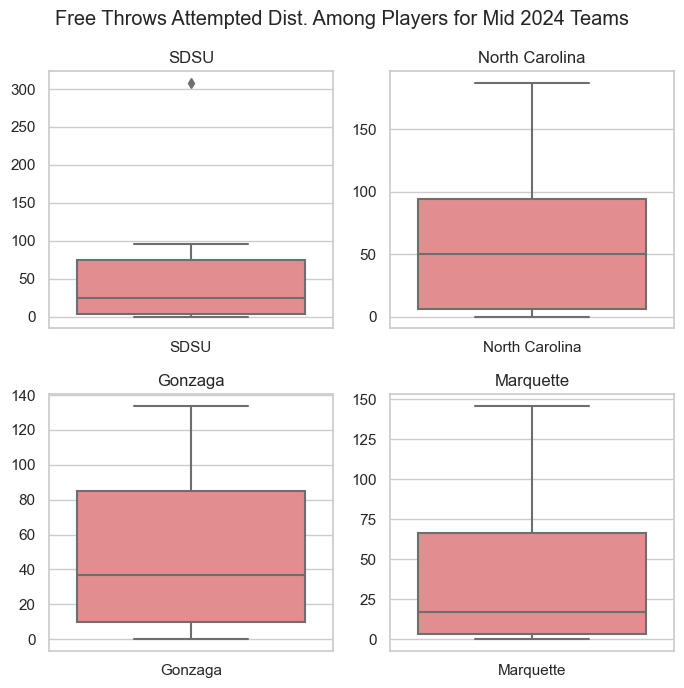

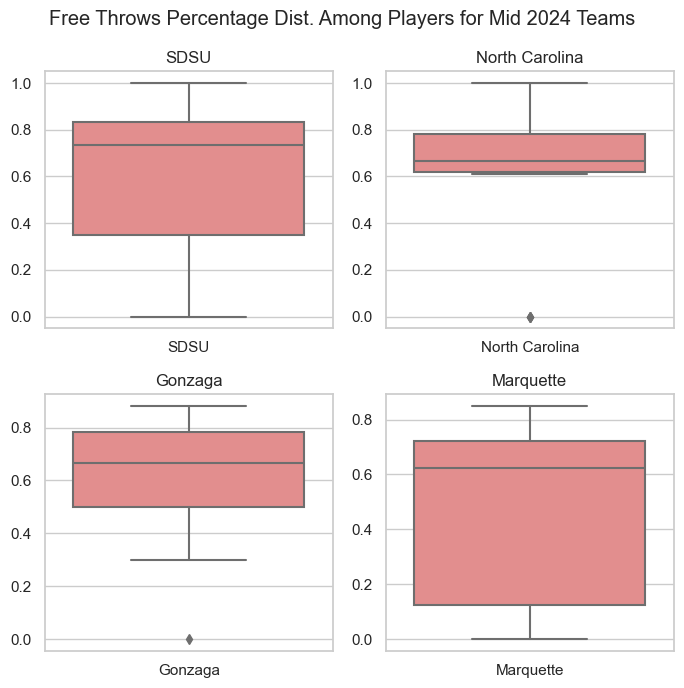

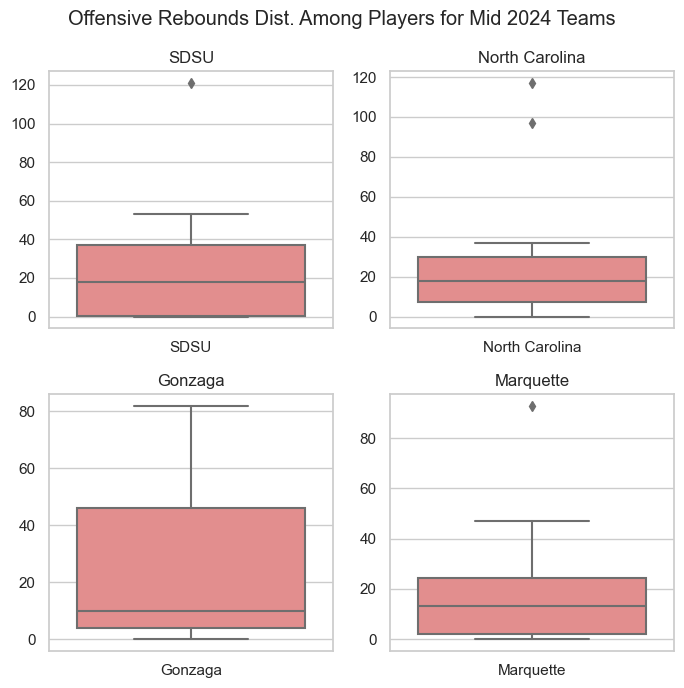

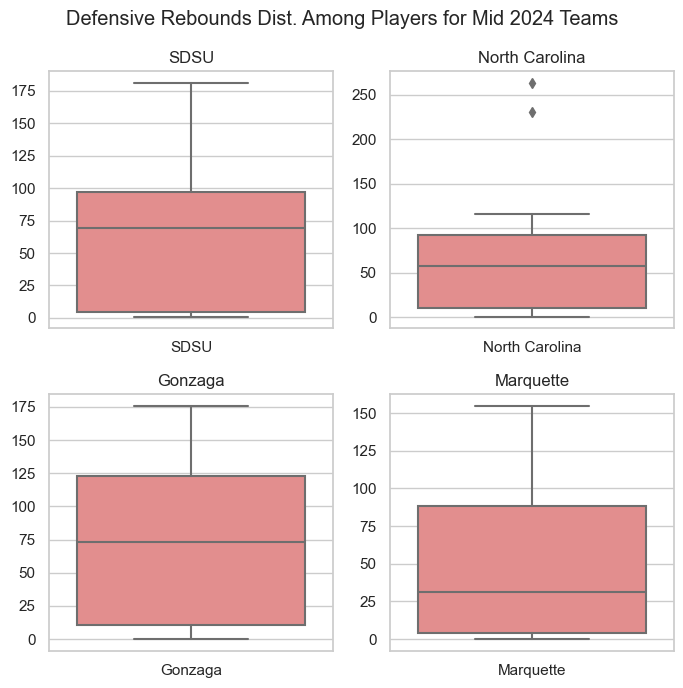

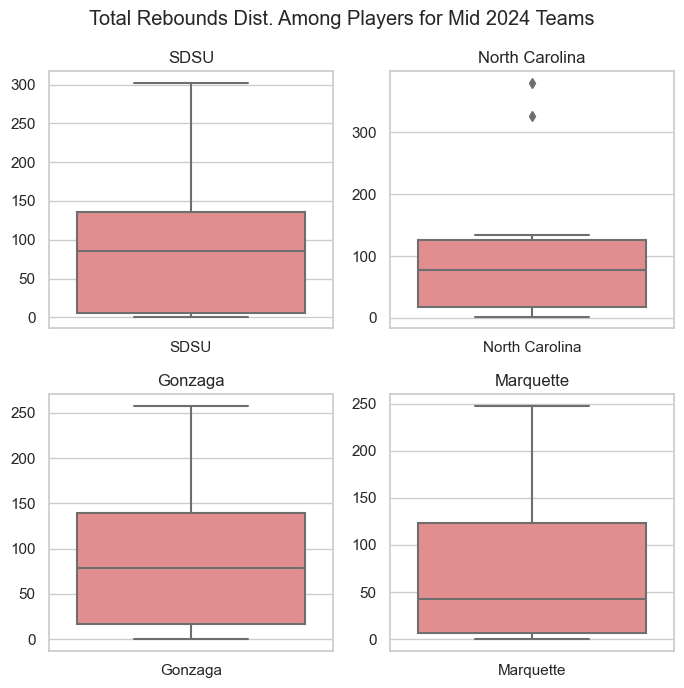

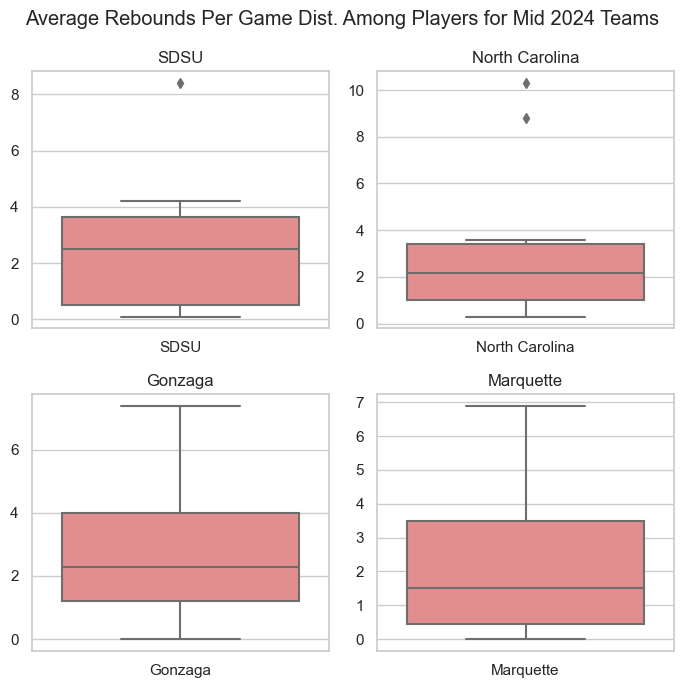

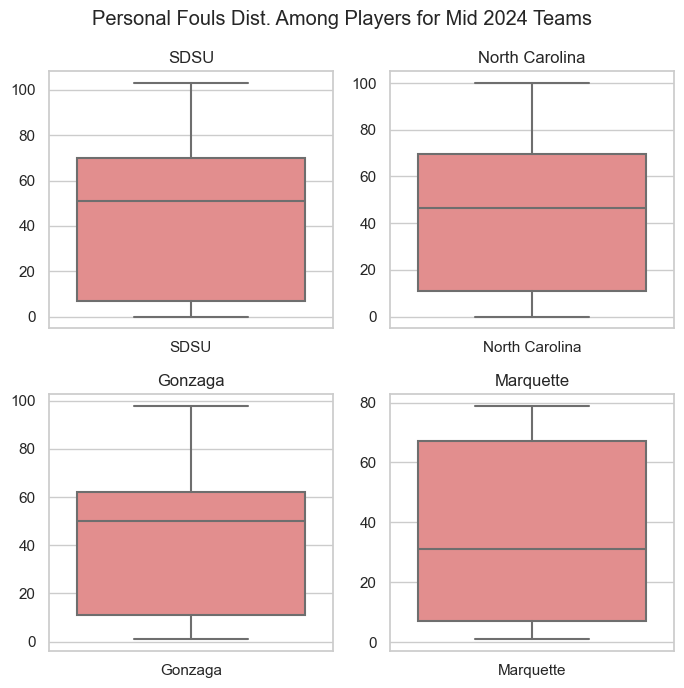

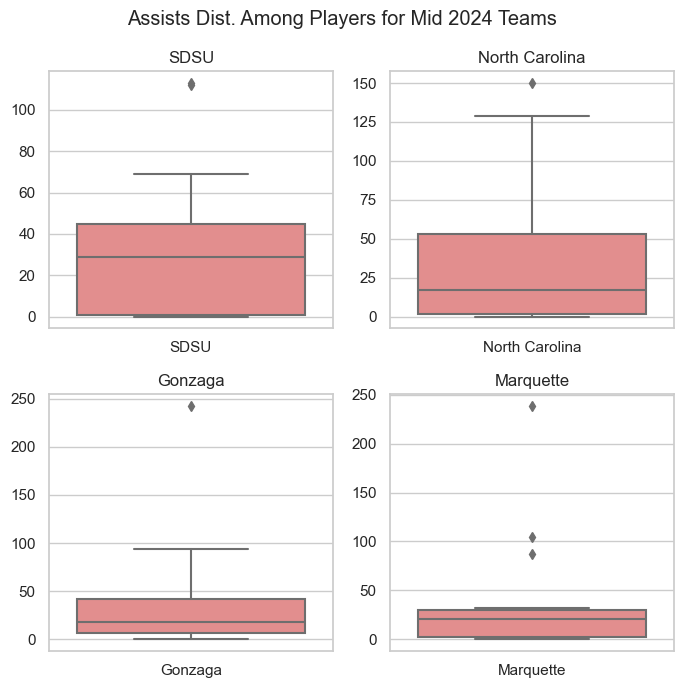

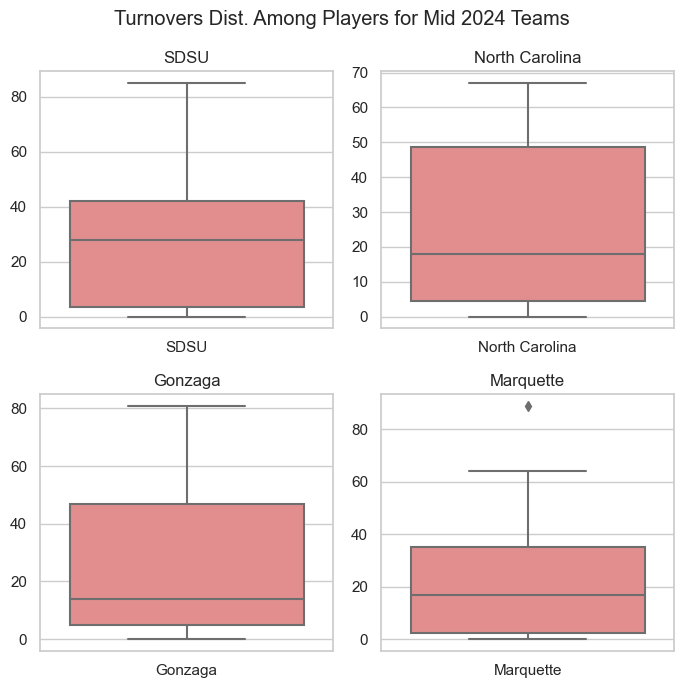

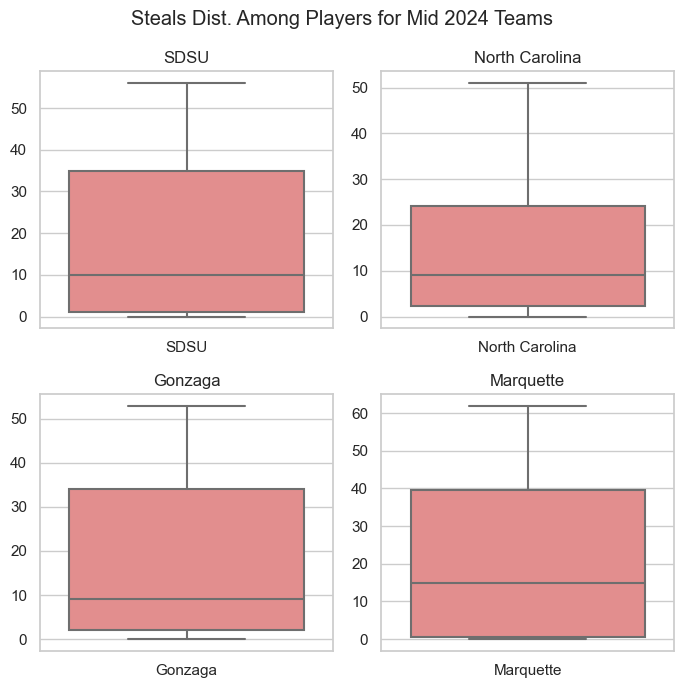

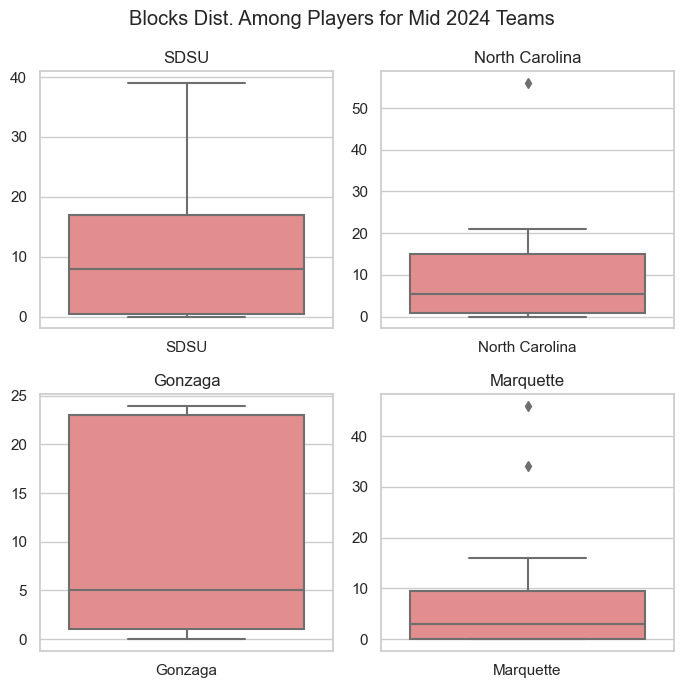

In [18]:
# four teams that made it to sweet 16, but not beyond
mid_teams=['SDSU','North Carolina','Gonzaga','Marquette']

# df of just mid teams
filtered_df_mid = df[df['Team'].isin(mid_teams)]

make_boxplots(filtered_df_mid,mid_teams,stats,'Mid 2024','lightcoral')

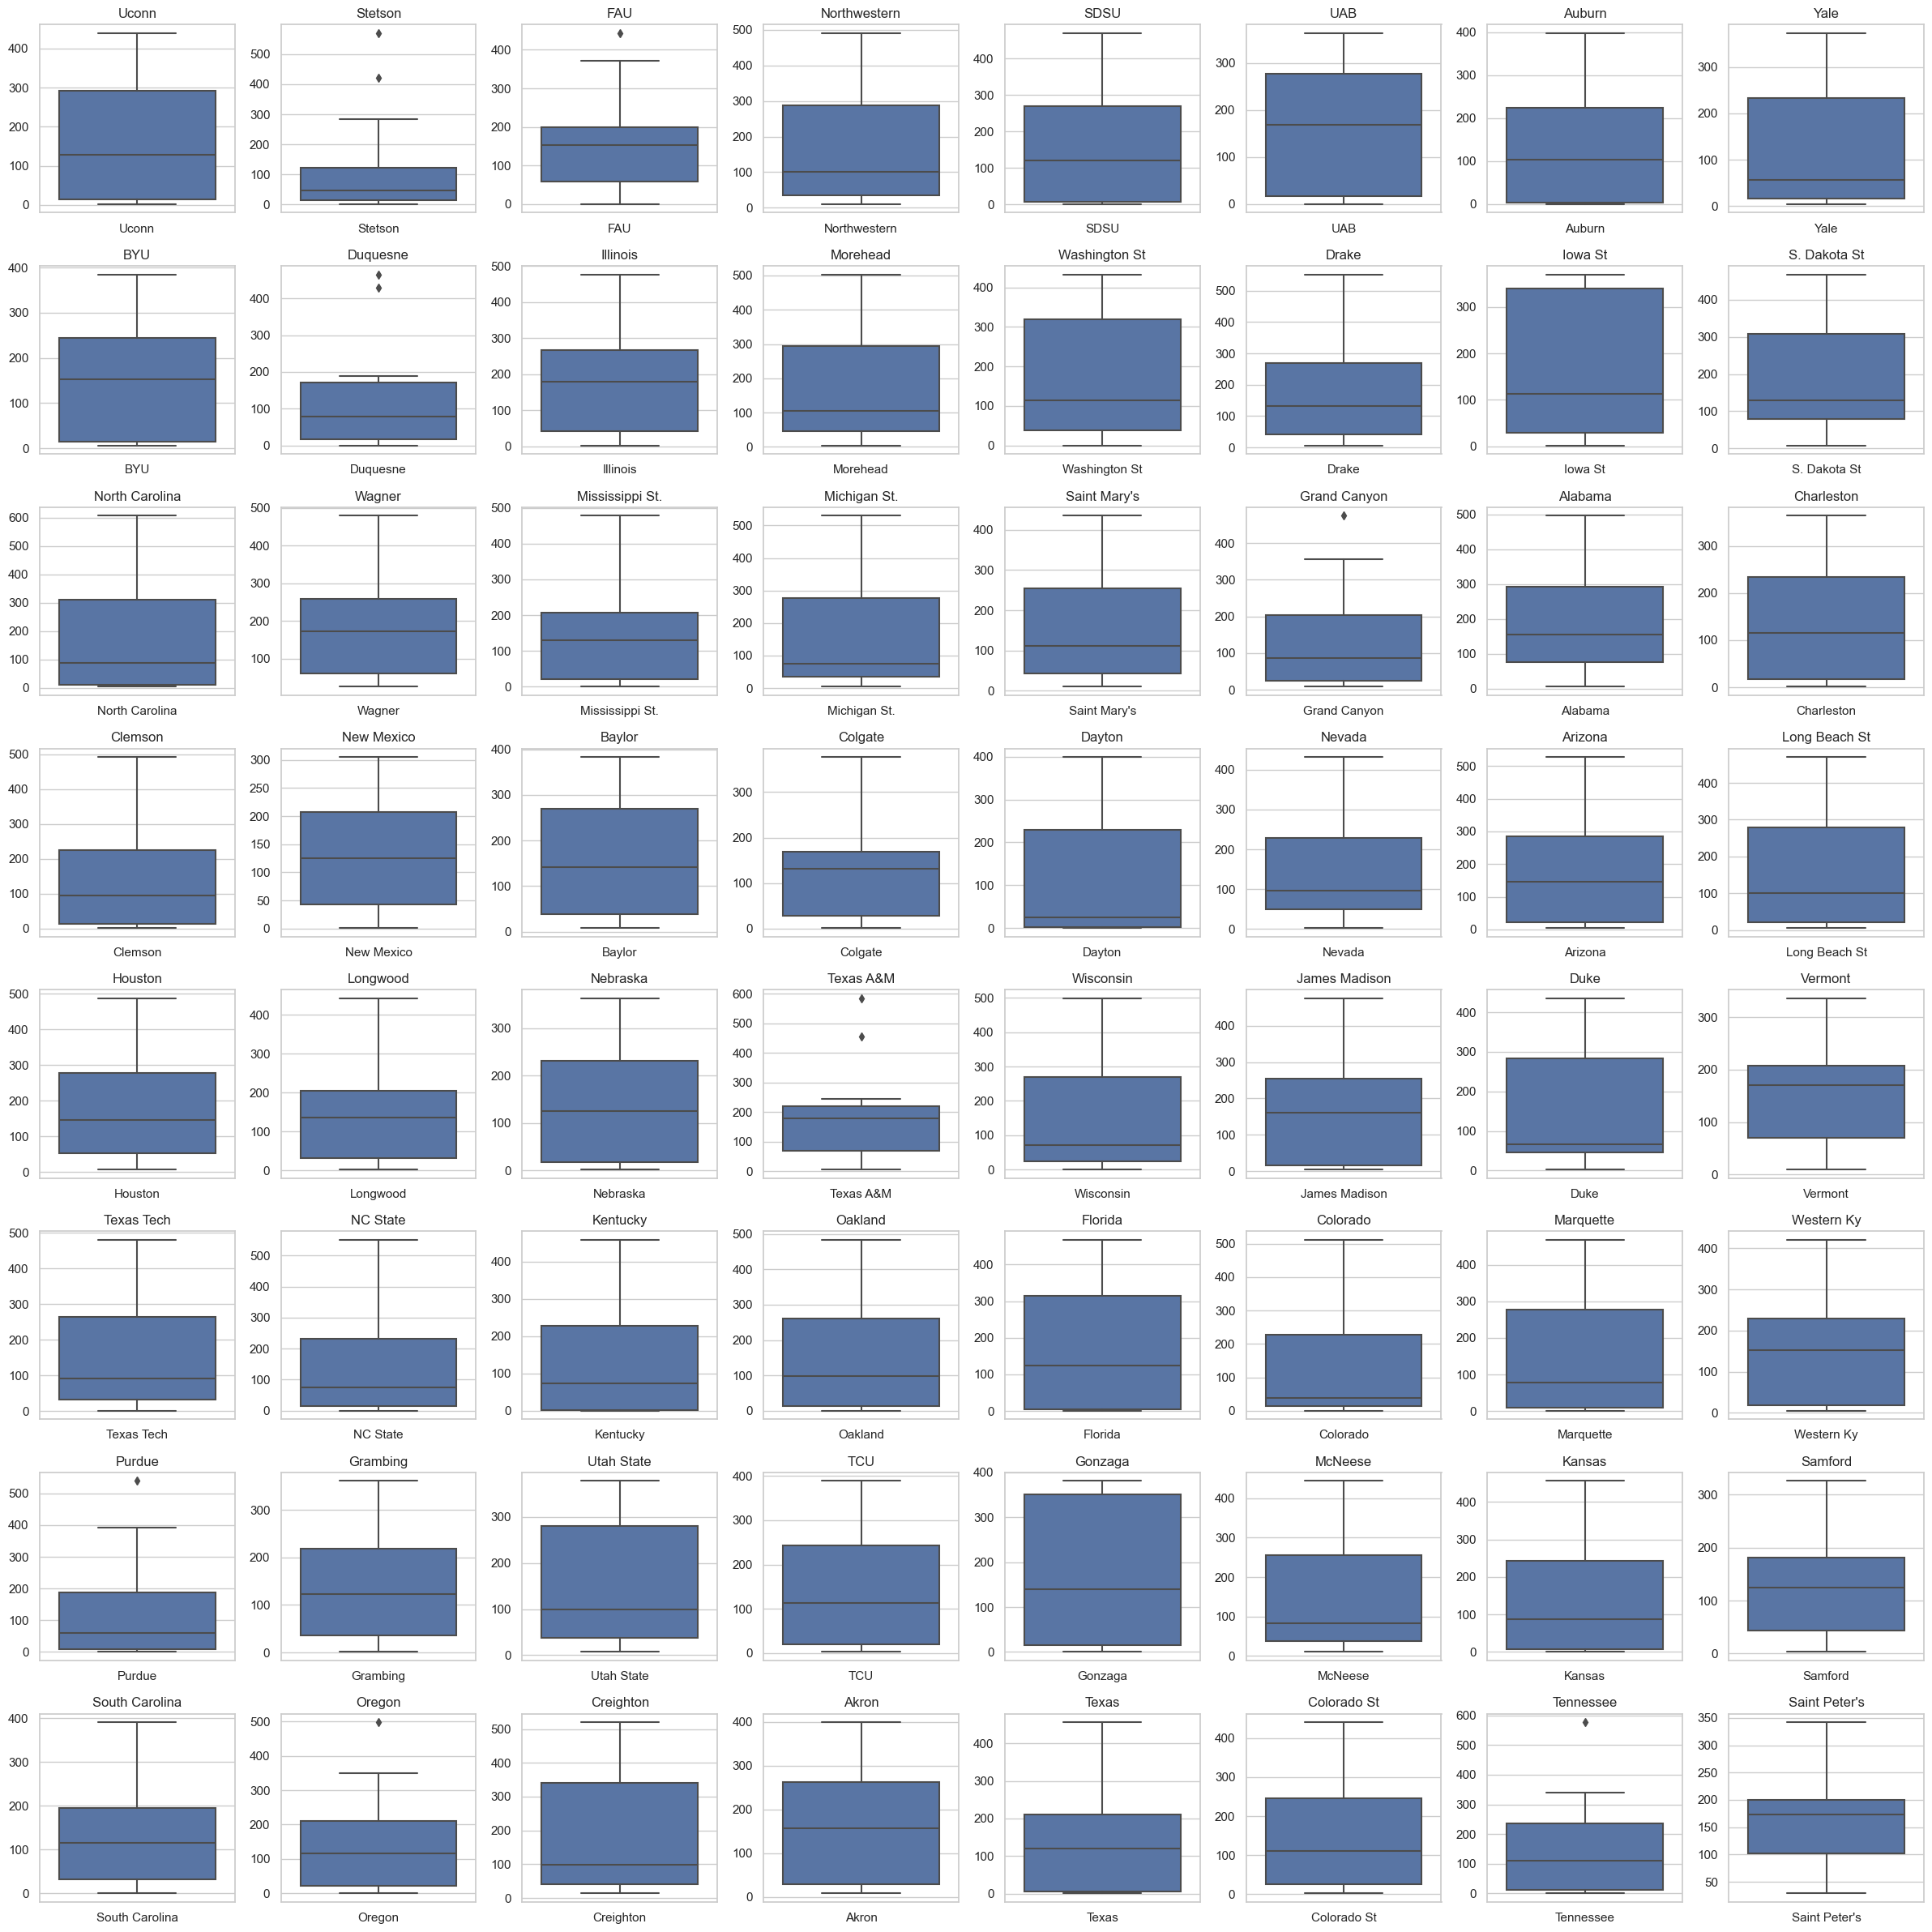

In [19]:
# Set viz
sns.set(style="whitegrid")

# Create an 8x8 grid of subplots
fig, axes = plt.subplots(8, 8, figsize=(24, 24))

# Plot the distribution of field goal % per Team
for i in range(8):
    for j in range(8):
        team = team_names[i * 8 + j]
        sns.boxplot(x='Team', y='Field Goals Attempted', data=df[df['Team'] == team], ax=axes[i, j])
        axes[i, j].set_title(team)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
# 2023 teams

In [21]:
df23 = pd.read_csv('2023_player_stats.csv')

In [22]:
df23.head()

Player  Games Played  Games Started  Total Minutes Played  \
0   Miller, Brandon             36             36                  1178   
1       Sears, Mark             36             36                  1077   
2     Clowney, Noah             35             35                   899   
3  Quinerly, Jahvon             34              5                   714   
4  Bediako, Charles             36             36                   743   

   Average Minutes Per Game  Field Goals Made  Field Goals Attempted  \
0                      32.7               216                    502   
1                      29.9               135                    325   
2                      25.7               121                    247   
3                      21.0               105                    262   
4                      20.6               103                    158   

   Field Goals Percentage  3pts Made  3pts Attempted  ...  Defensive Rebounds  \
0                   0.430        102             267  ...                 223   
1                   0.415         68             192  ...                 105   
2                   0.490         33             116  ...                 206   
3                   0.401         44             124  ...                  58   
4                   0.652          0               6  ...                 117   

   Total Rebounds  Average Rebounds Per Game  Personal Fouls  Assists  \
0             296                        8.2              86       71   
1             130                        3.6              58       92   
2             280                        8.0              90       30   
3              65                        1.9              50      122   
4             216                        6.0             110       23   

   Turnovers  Steals  Blocks     Team  Tournament Wins  
0         80      32      32  Alabama                2  
1         70      42       3  Alabama                2  
2         46      21      33  Alabama                2  
3         72      22       0  Alabama                2  
4         30      22      62  Alabama                2  

[5 rows x 27 columns]

In [23]:
df23.isna().sum()

Player                       0
Games Played                 0
Games Started                0
Total Minutes Played         0
Average Minutes Per Game     0
Field Goals Made             0
Field Goals Attempted        0
Field Goals Percentage       0
3pts Made                    0
3pts Attempted               0
3pts Percentage              0
Free Throws Made             0
Free Throws Attempted        0
Free Throws Percentage       0
Total Points                 0
Average Points Per Game      0
Offensive Rebounds           0
Defensive Rebounds           0
Total Rebounds               0
Average Rebounds Per Game    0
Personal Fouls               0
Assists                      0
Turnovers                    0
Steals                       0
Blocks                       0
Team                         0
Tournament Wins              0
dtype: int64

In [24]:
top_4_2023 = ['FAU','Uconn','SDSU','Umiami']
filtered_df_top_23 = df23[df23['Team'].isin(top_4_2023)]

mid_teams_2023 = ['Alabama','Princeton','UCLA','Michigan St']
filtered_df_mid_23 = df23[df23['Team'].isin(mid_teams_2023)]

bad_teams_2023 = ['Texas A&M-CC','N Kentucky','Vermont','Howard']
filtered_df_bottom_23 = df23[df23['Team'].isin(bad_teams_2023)]

# same logic applied

In [25]:
filtered_df_top_23

Player  Games Played  Games Started  Total Minutes Played  \
60            Matt Bradley            39             39                  1032   
61        Darrion Trammell            38             37                  1034   
62           Lamont Butler            39             38                  1012   
63            Jaedon Ledee            39              1                   704   
64          Keshad Johnson            39             39                   865   
65           Micah Parrish            39              1                   837   
66           Nathan Mensah            39             38                   811   
67              Adam Seiko            37              1                   738   
68              Aguek Arop            37              1                   596   
69              Miles Byrd             4              0                    40   
70       Demarshay Johnson            16              0                    93   
71         Elijah Saunders             9              0                    31   
72              Cade Alger             9              0                    17   
73           Jared Barnett            10              0                    27   
74       Triston Broughton             4              0                     5   
75         Tyler Broughton             6              0                     9   
277         Martin, Alijah            36             21                   951   
278         Davis, Johnell            37             16                   962   
279      Goldin, Vladislav            39             39                   819   
280            Boyd , Nick            38             37                   908   
281      Forrest, Michael             37              1                   768   
282        Greenlee, Bryan            39             34                   963   
283  Weatherspoon, Brandon            39             23                   622   
284     Rosado, Giancarlo             39              0                   655   
285         Gaffney, Jalen            38             23                   853   
286           Carroll, Tre            18              0                   102   
287         Gaines, Isaiah            25              1                   137   
288        Lorient, Brenen            21              0                    69   
289      Ralat, Alejandro             14              0                    41   
509            Isaiah Wong            37             37                  1237   
510          Jordan Miller            37             37                  1293   
511             Nijel Pack            35             35                  1106   
512          Norchad Omier            37             36                  1067   
513           Wooga Poplar            37             36                   870   
514         Bensley Joseph            37              2                   739   
515        Harlond Beverly            37              1                   451   
516         Anthony Walker            37              1                   377   
517       Christian Watson            11              0                    36   
518               AJ Casey            29              0                   185   
519            Favour Aire            14              0                    37   
520         Jakai Robinson             7              0                    16   
521      Danilo Jovanovich             1              0                     2   
522       Filippos Gkogkos             2              0                     2   
754          Sanogo, Adama            39             39                  1038   
755        Hawkins, Jordan            37             37                  1088   
756        Newton, Tristen            39             38                  1121   
757          Karaban, Alex            39             38                  1129   
758     Jackson Jr., Andre            36             31                  1047   
759       Clingan, Donovan            39           

In [26]:
team_names2=df23['Team'].unique()

In [27]:
len(team_names2) #sanity check

64

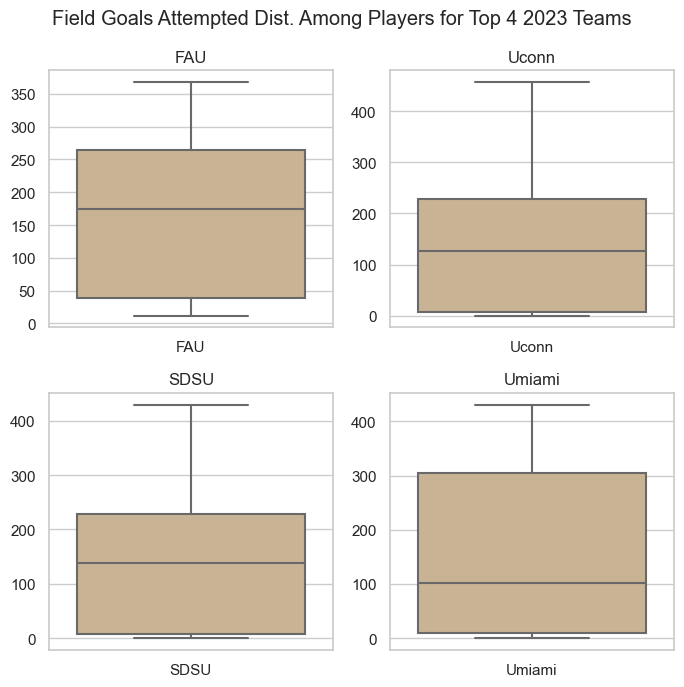

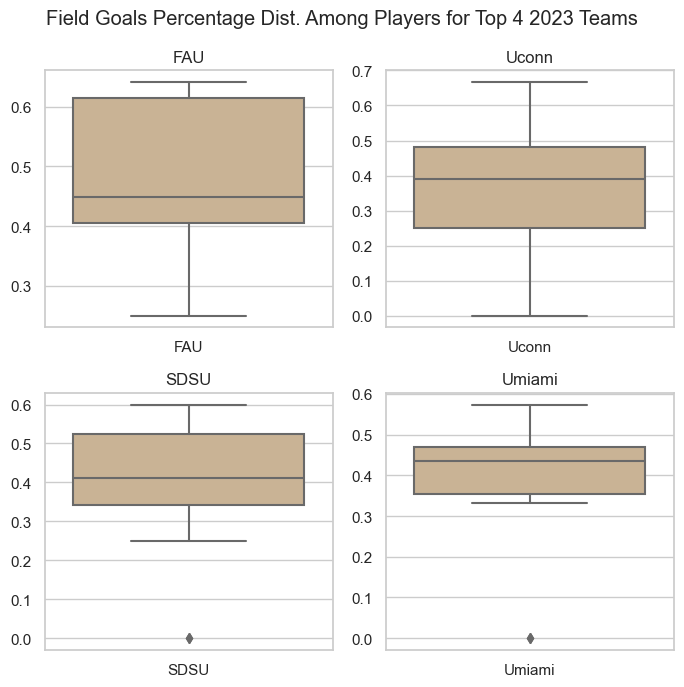

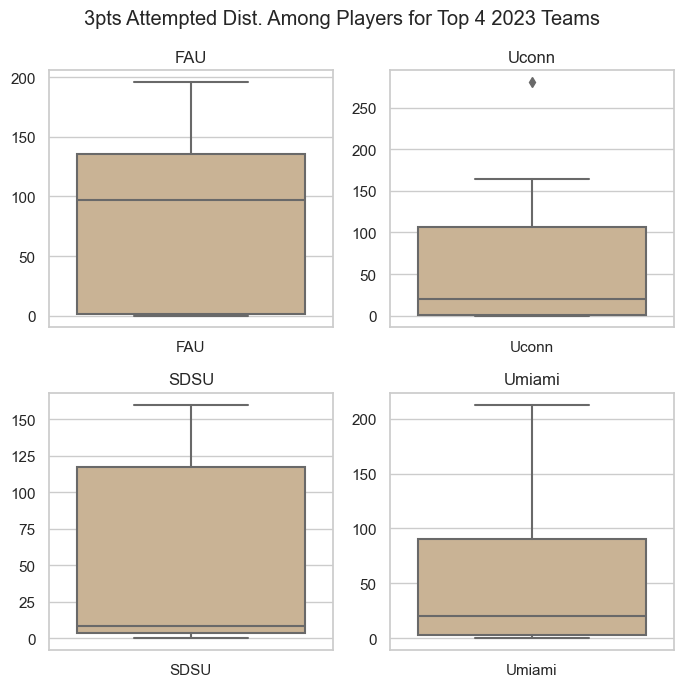

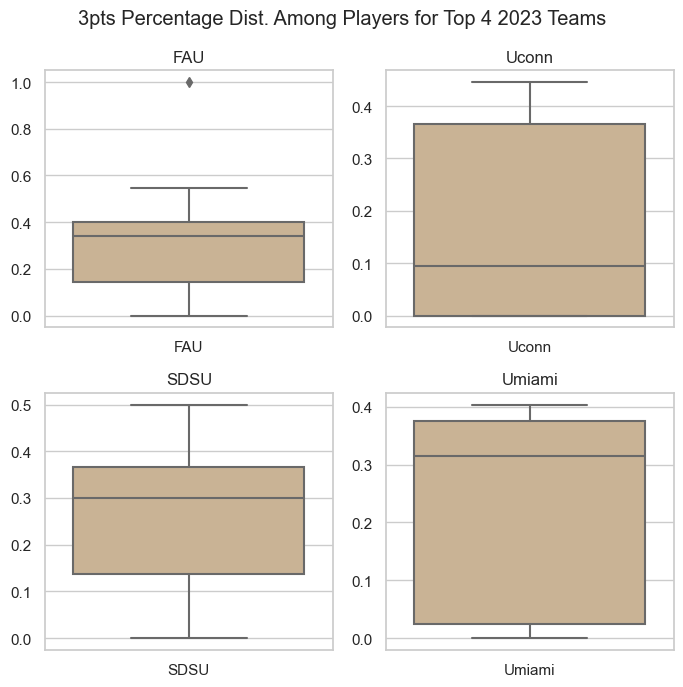

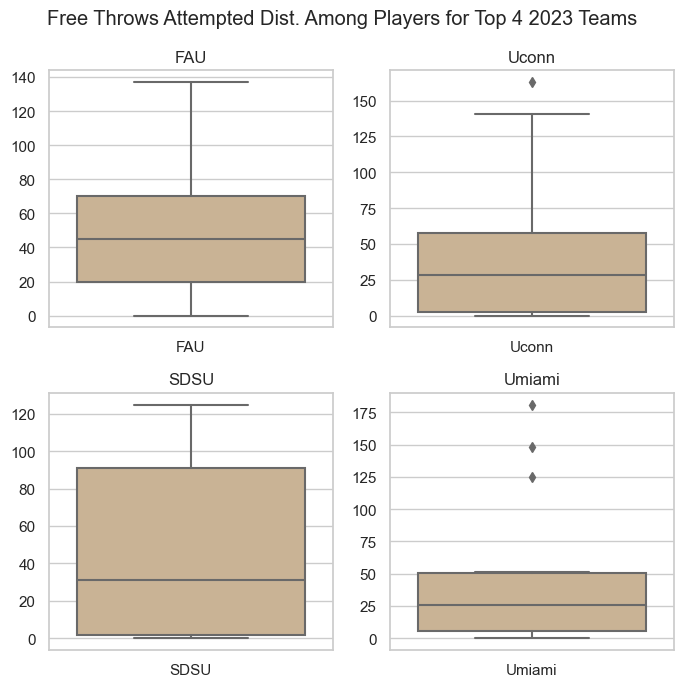

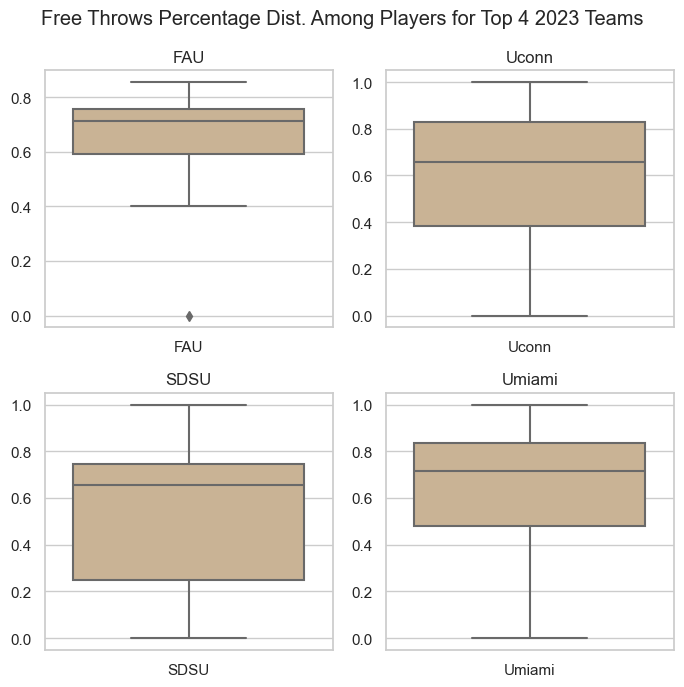

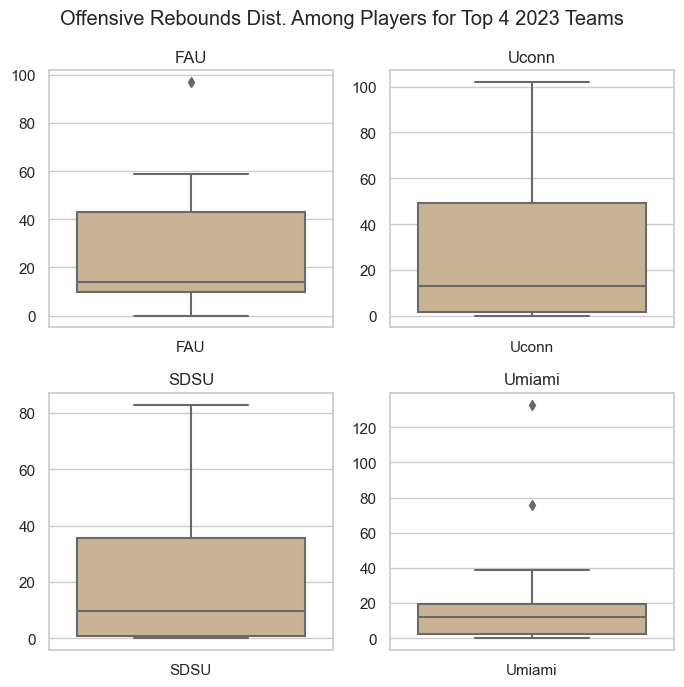

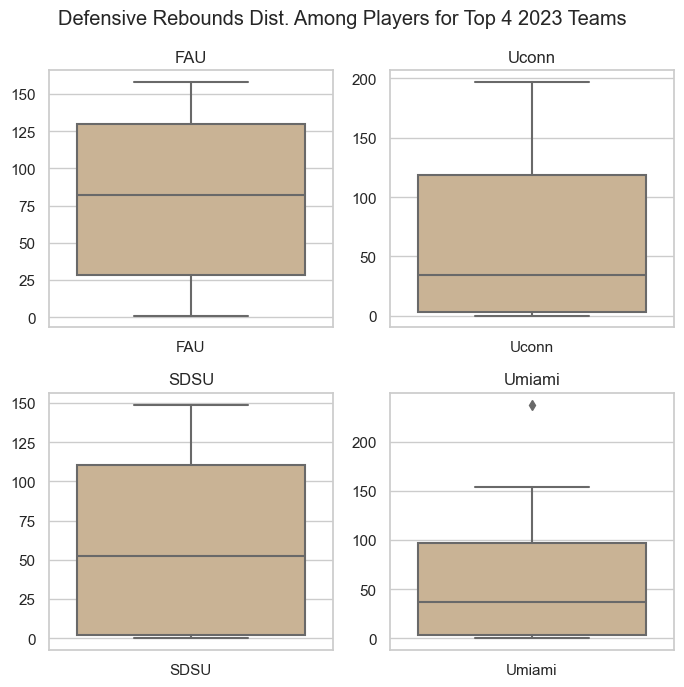

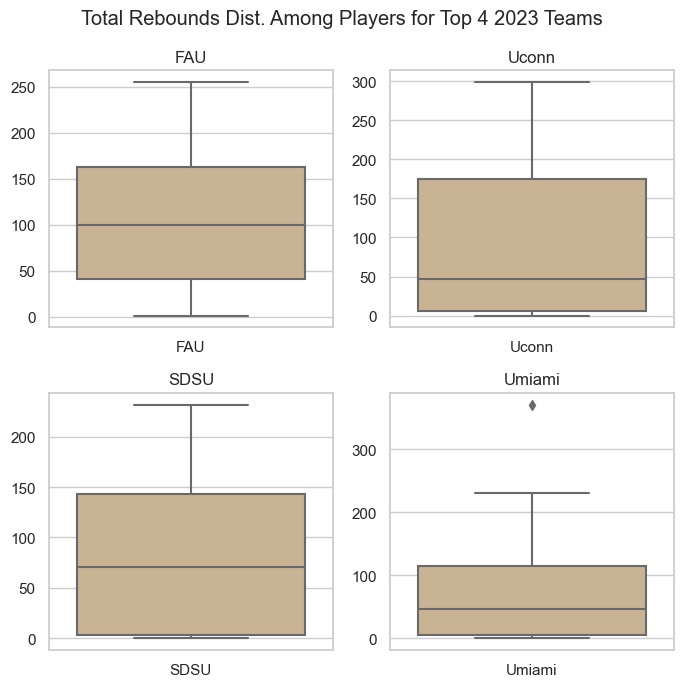

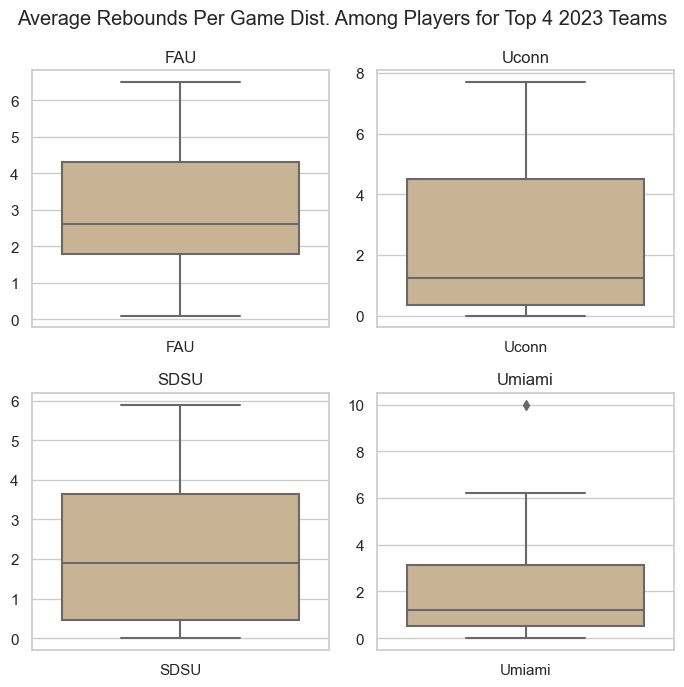

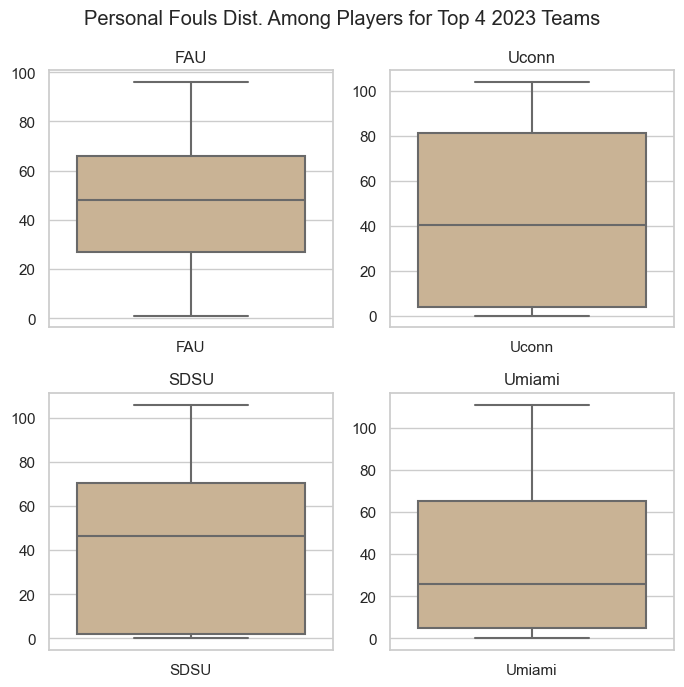

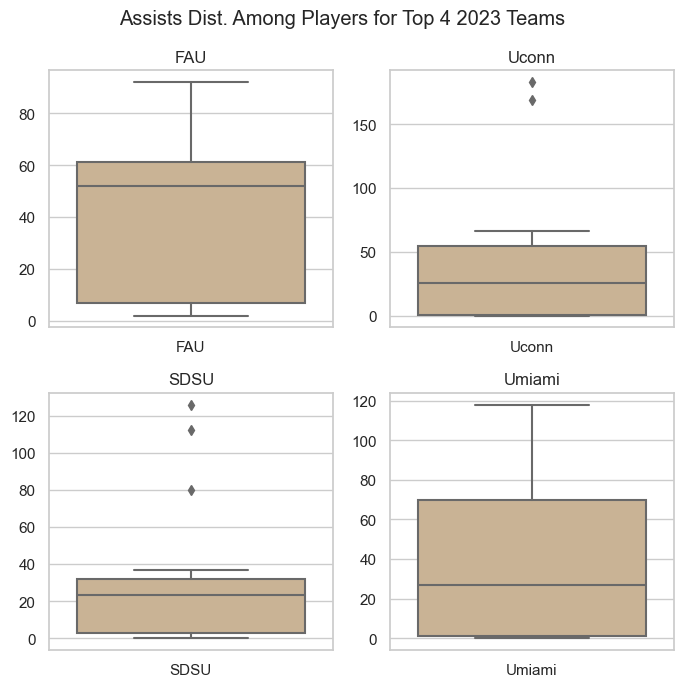

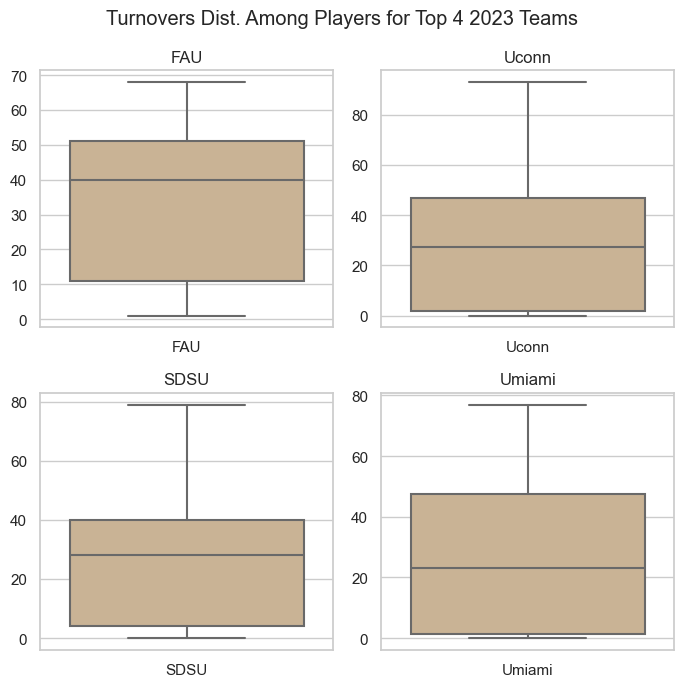

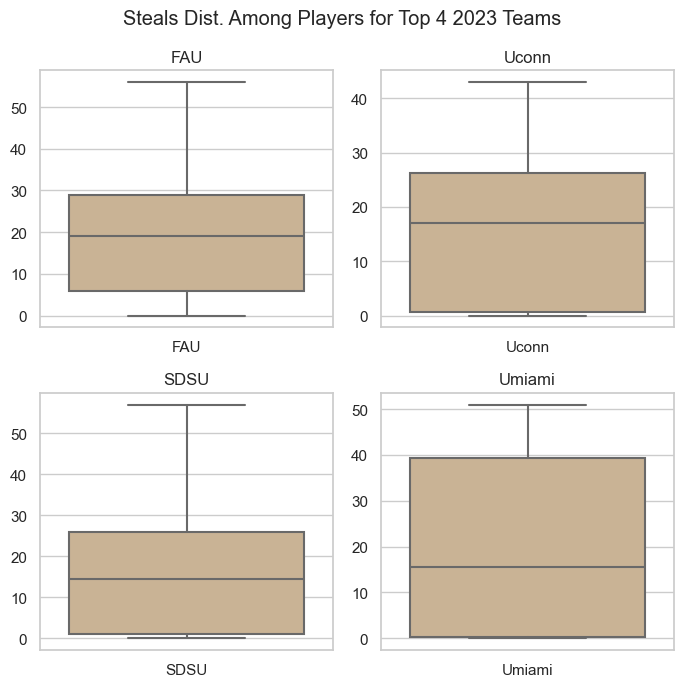

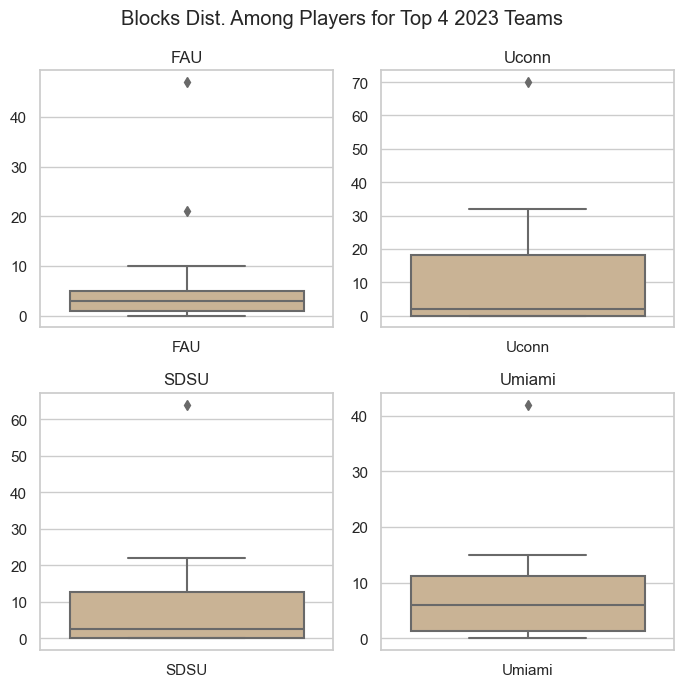

In [28]:
make_boxplots(filtered_df_top_23,top_4_2023,stats,'Top 4 2023','tan')

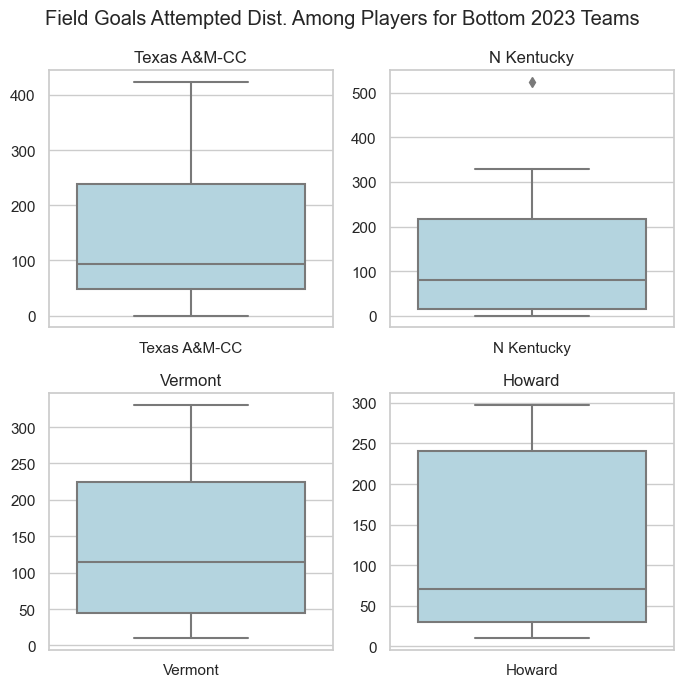

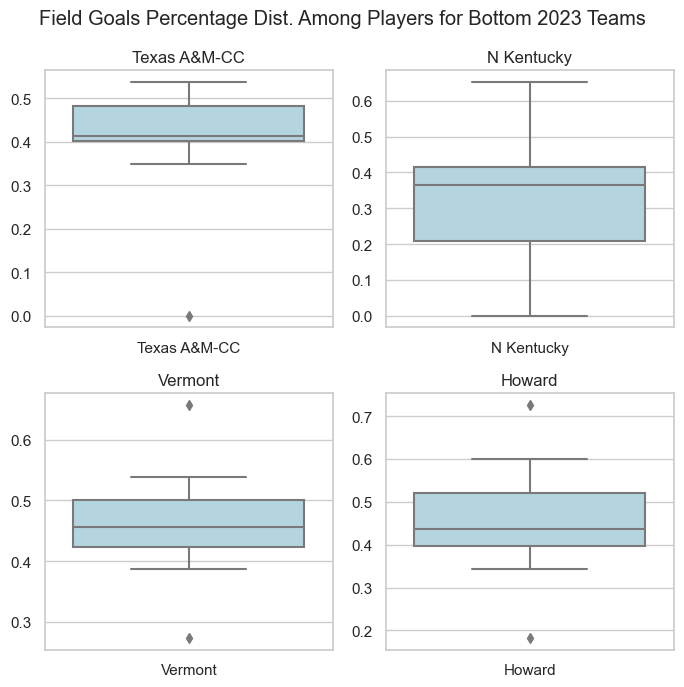

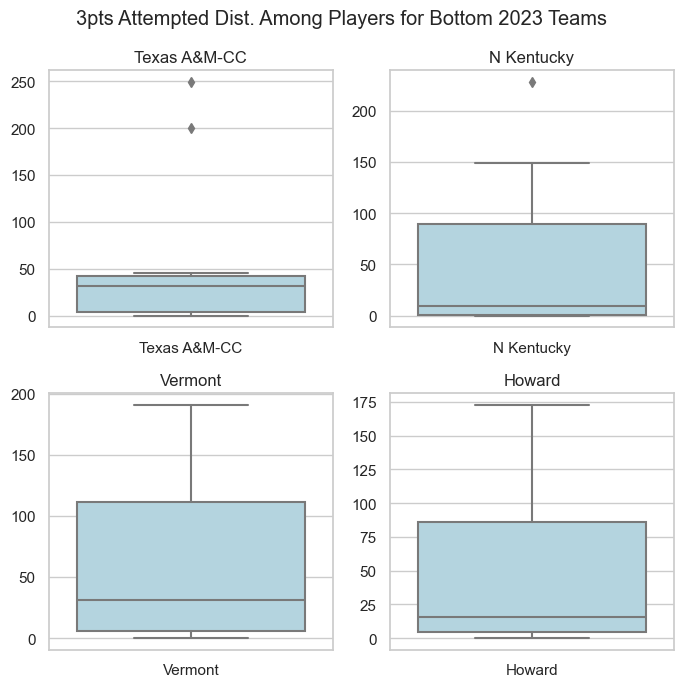

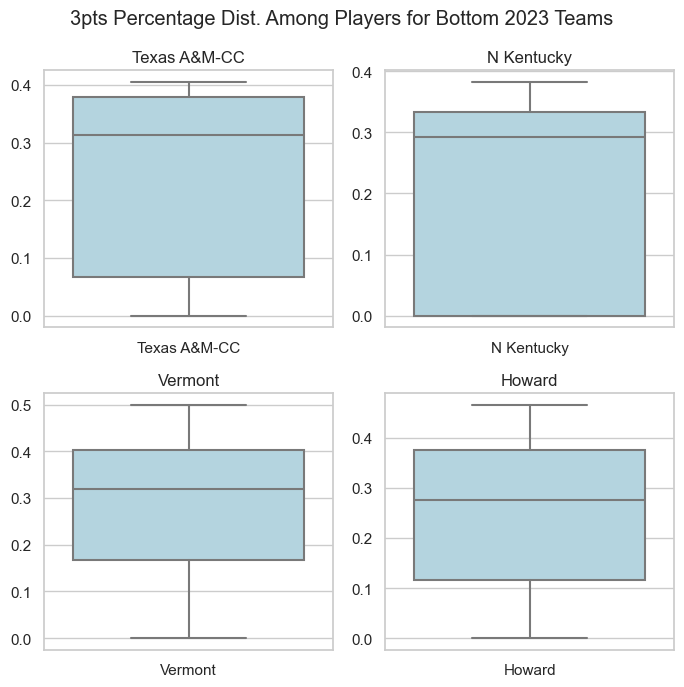

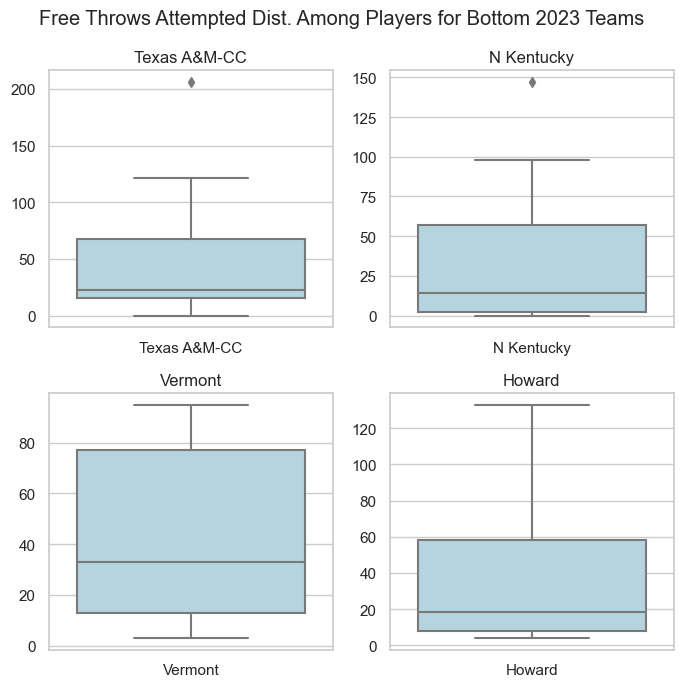

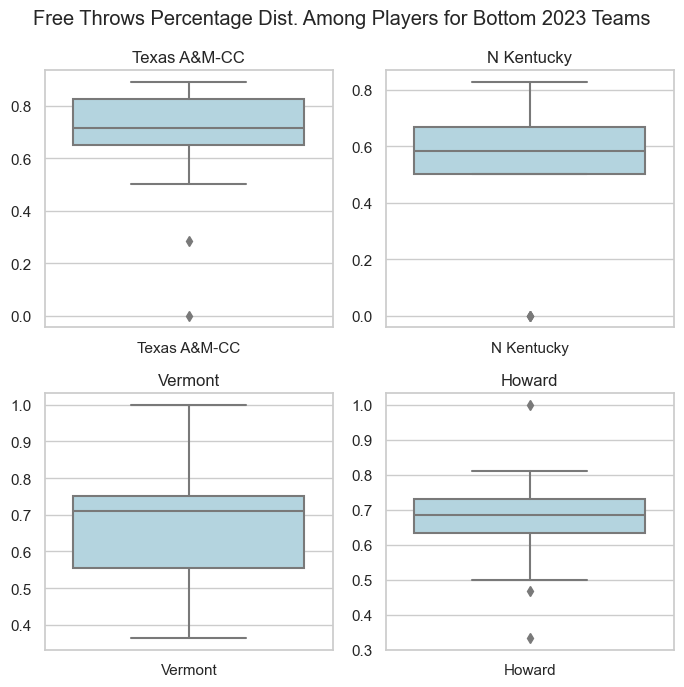

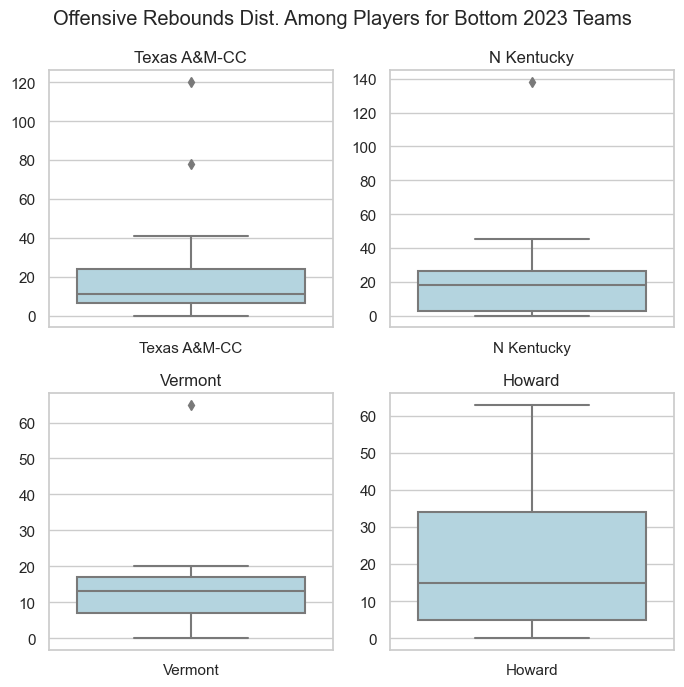

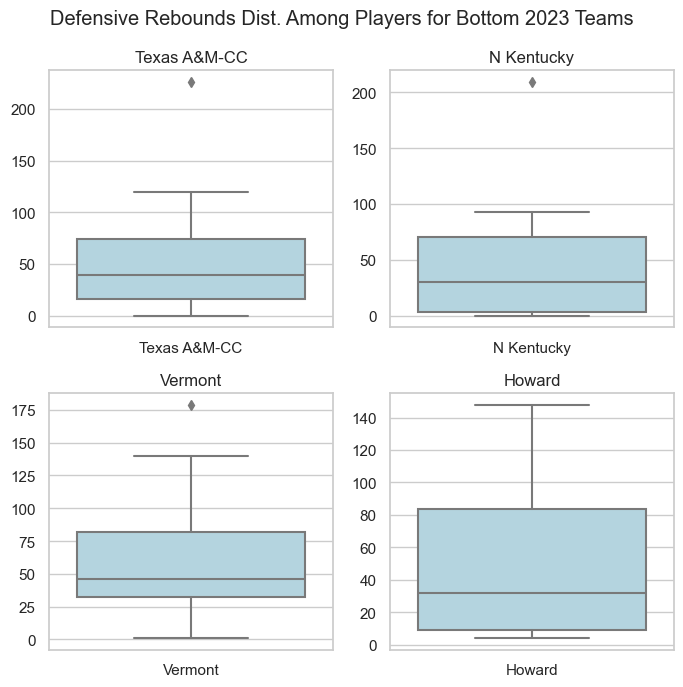

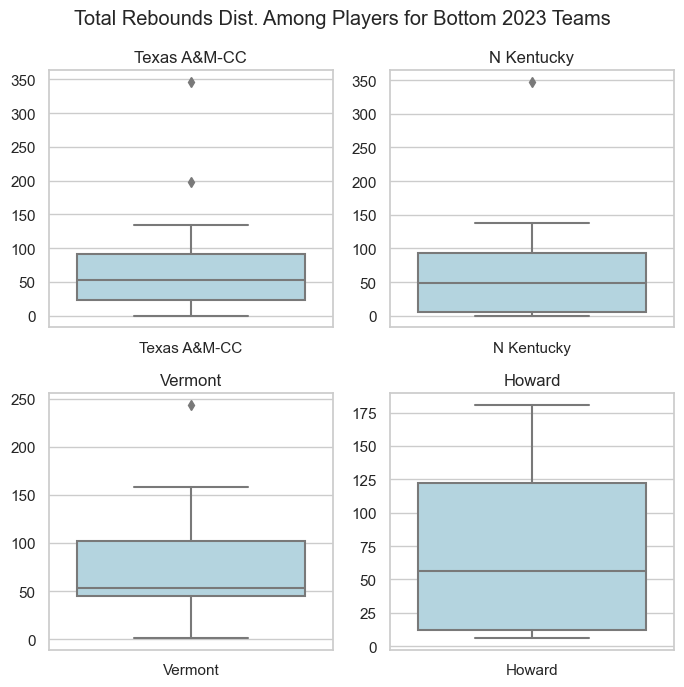

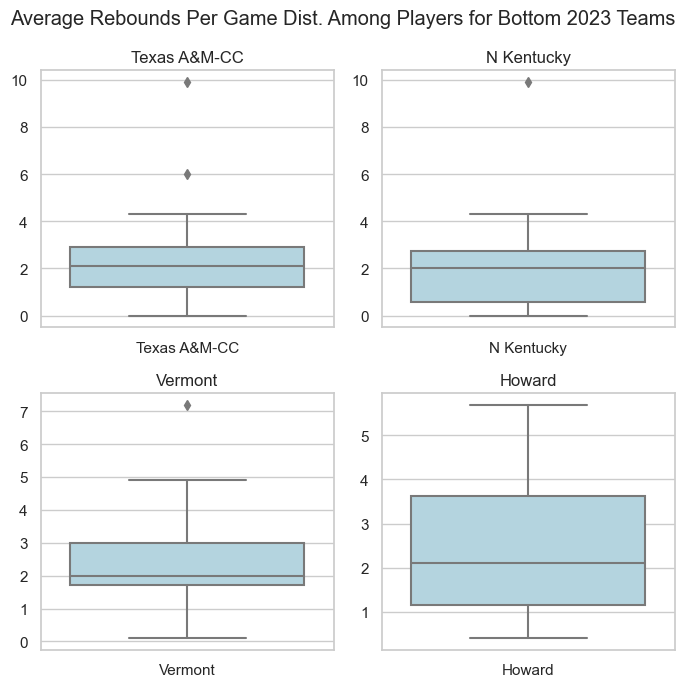

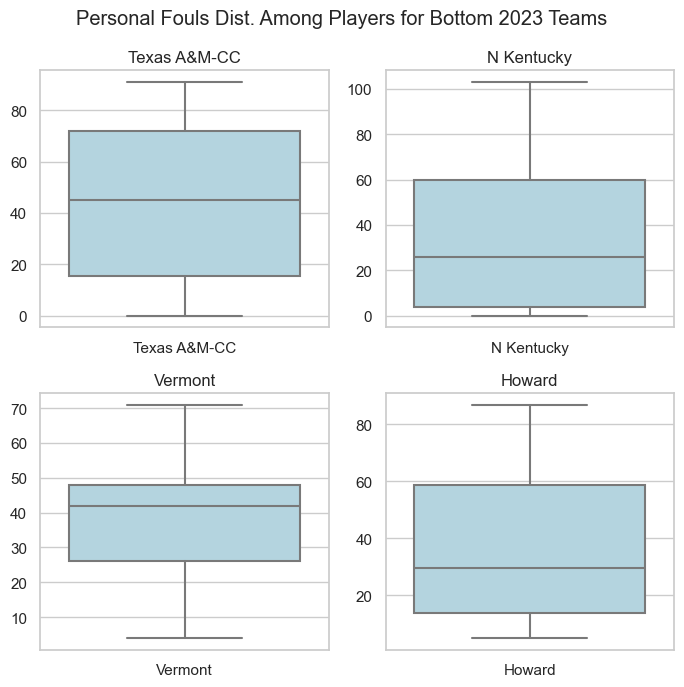

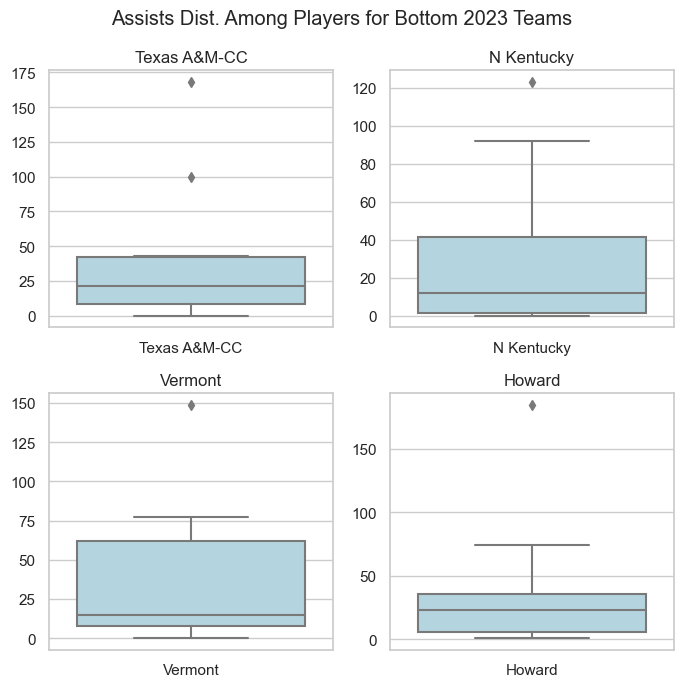

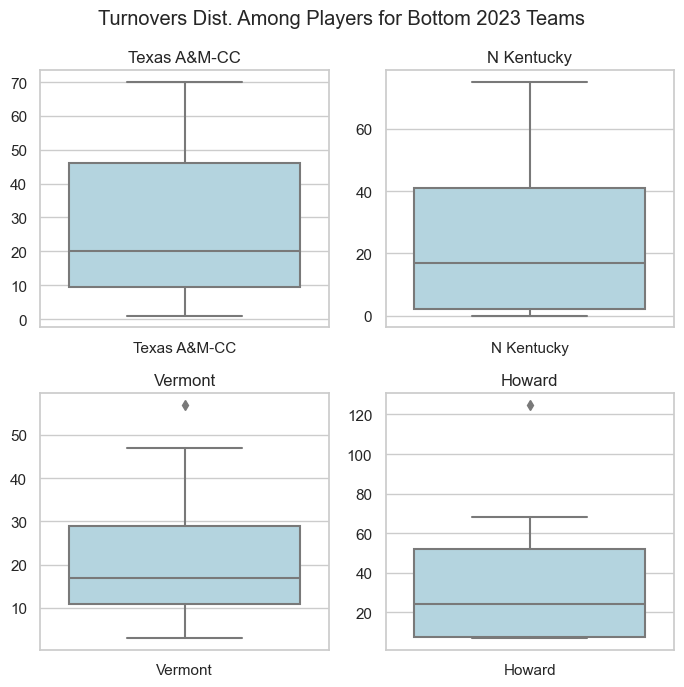

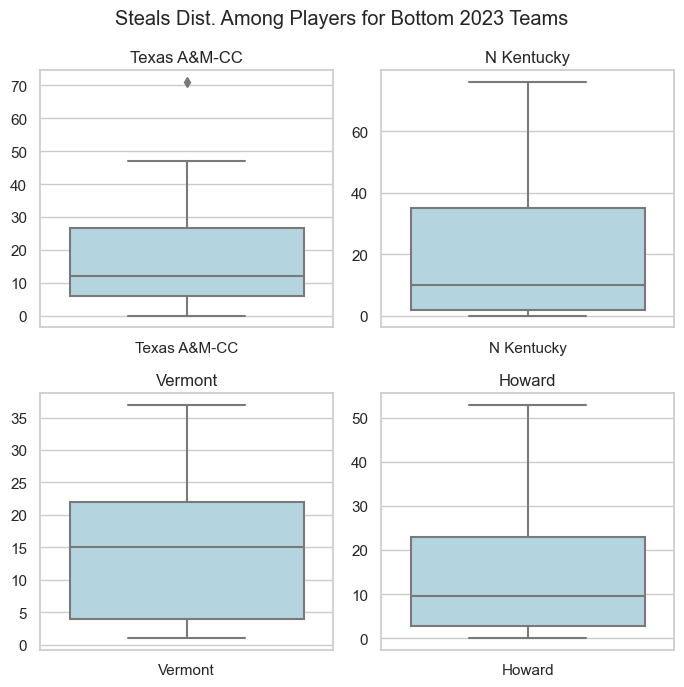

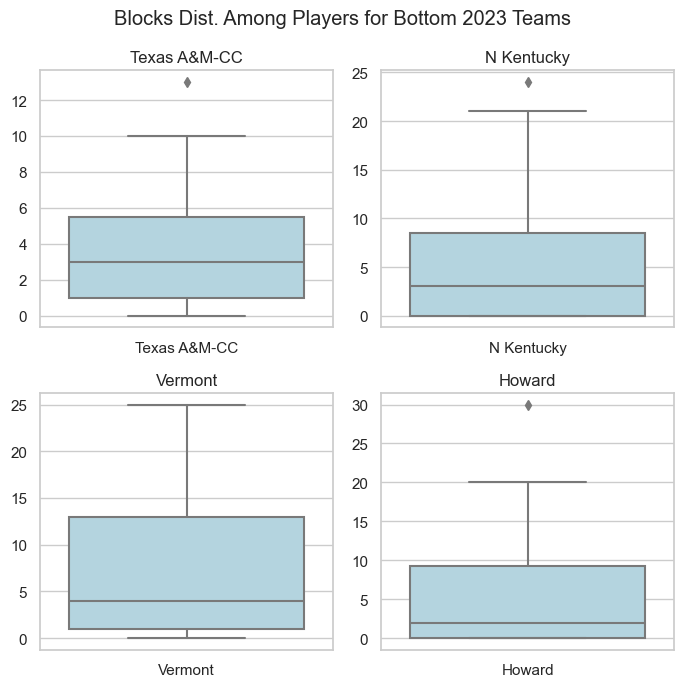

In [29]:
make_boxplots(filtered_df_bottom_23,bad_teams_2023,stats,'Bottom 2023','lightblue')

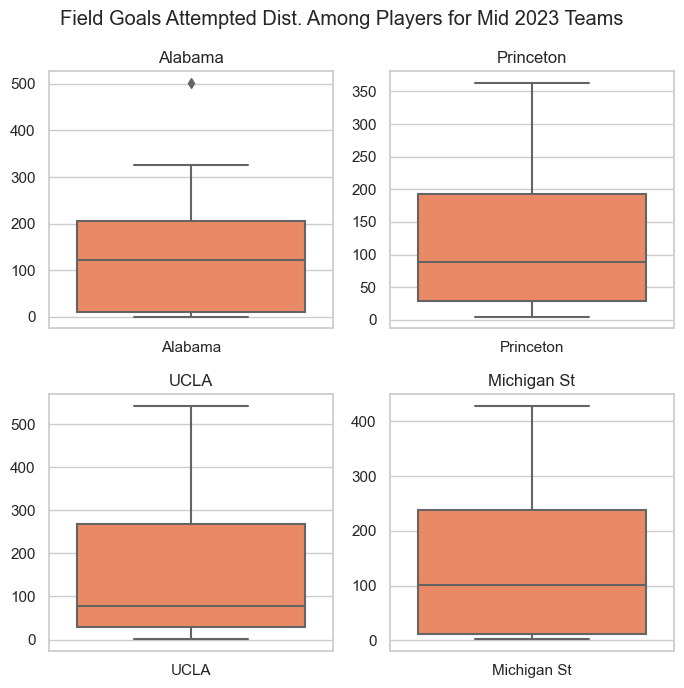

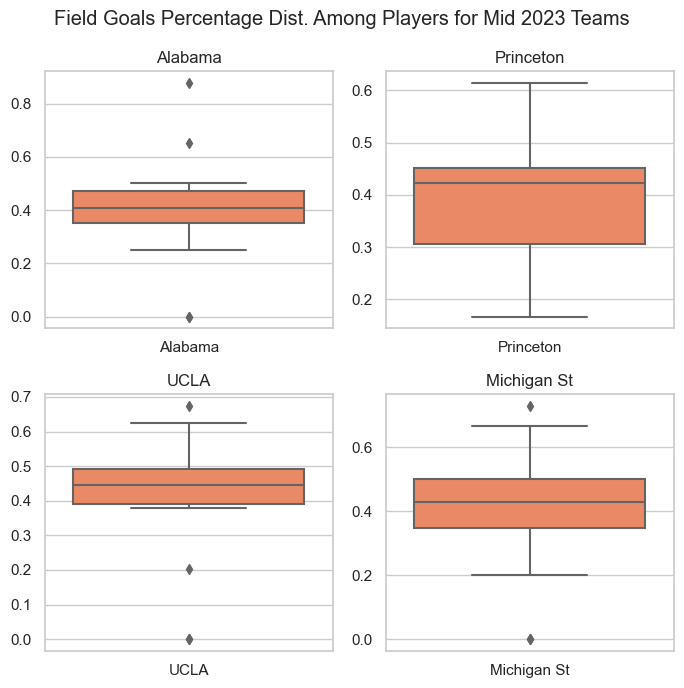

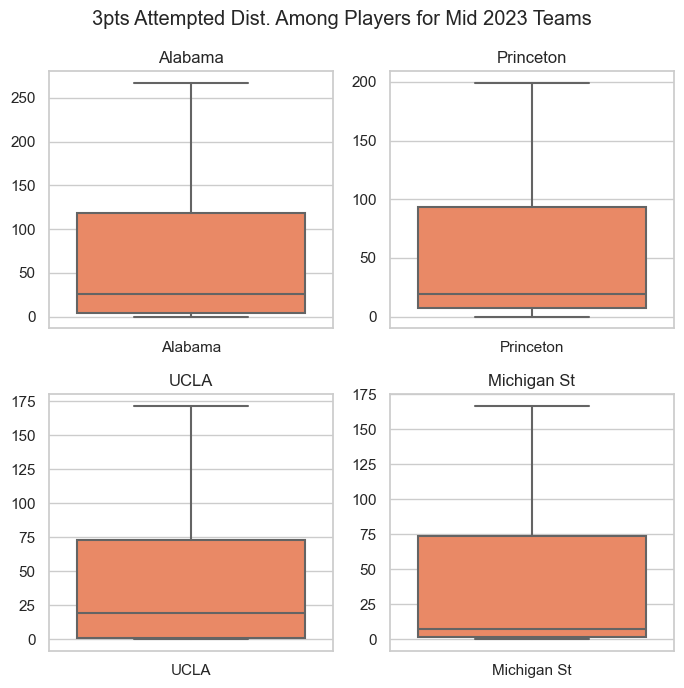

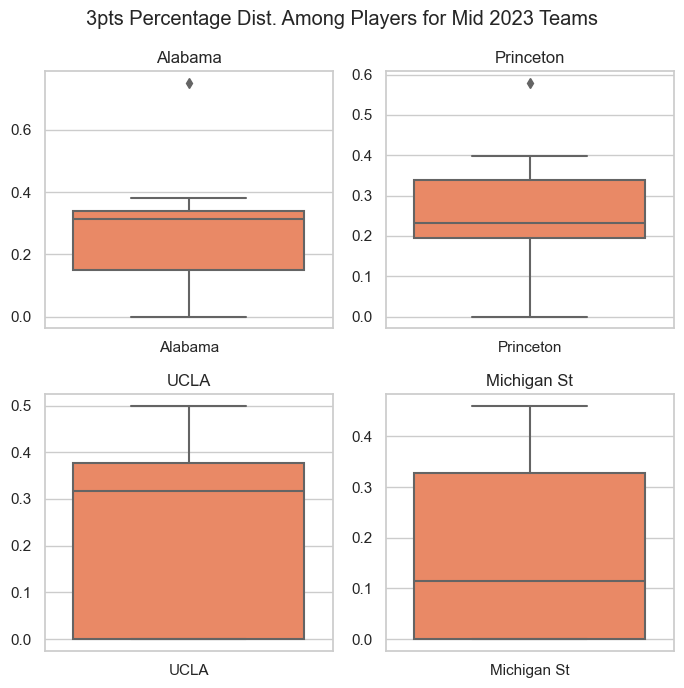

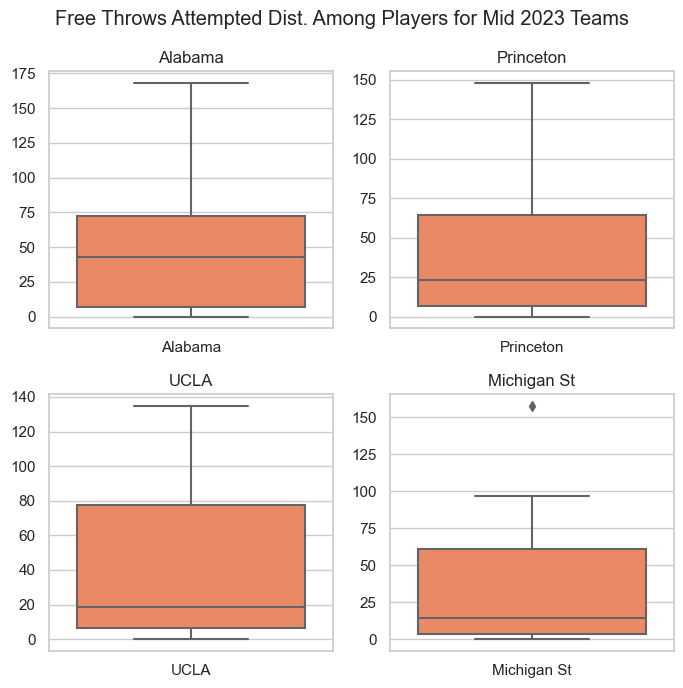

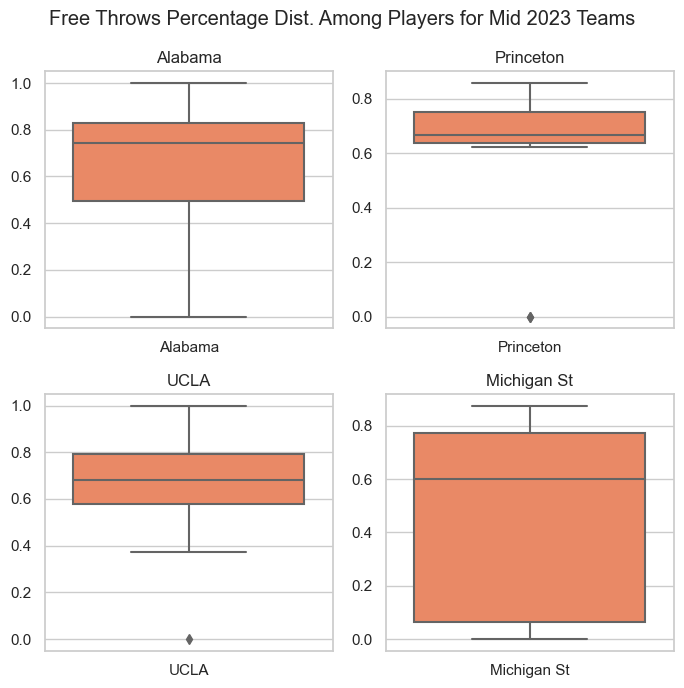

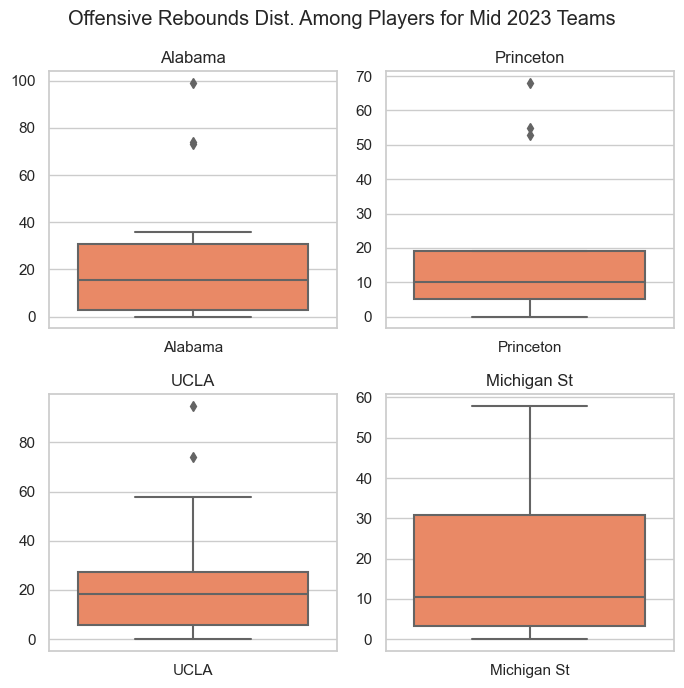

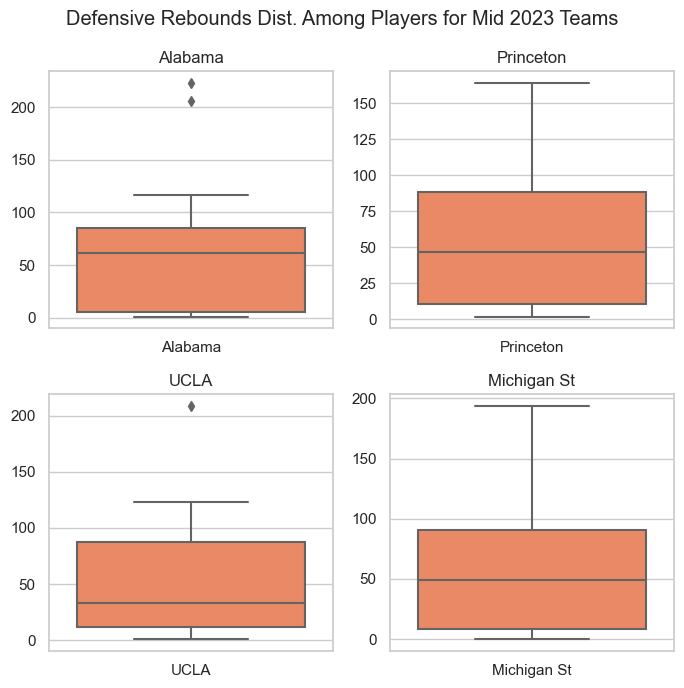

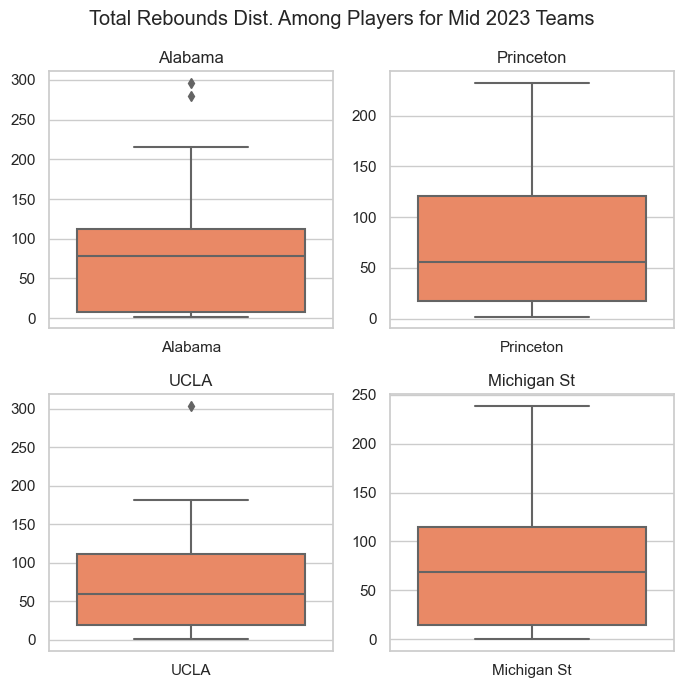

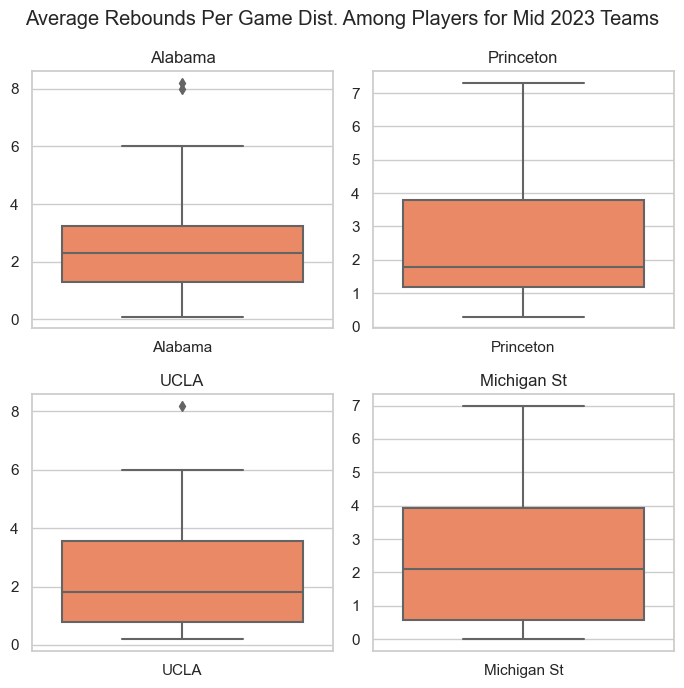

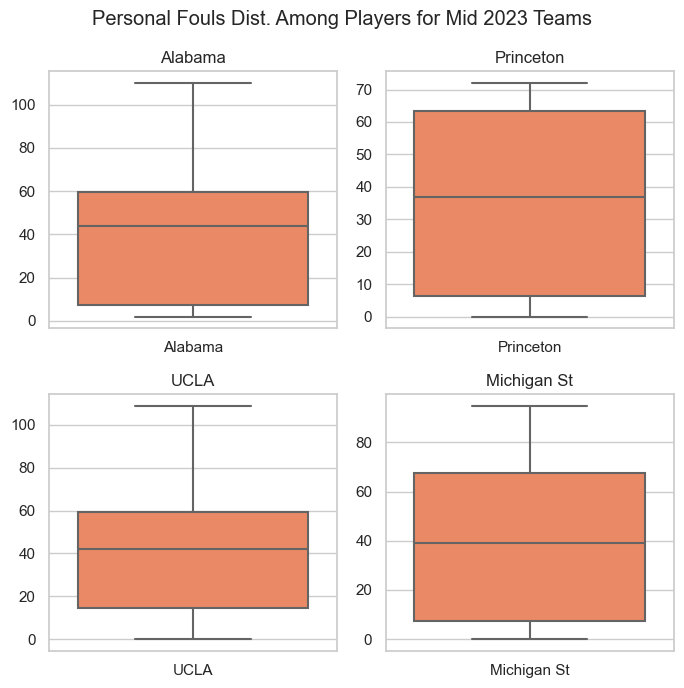

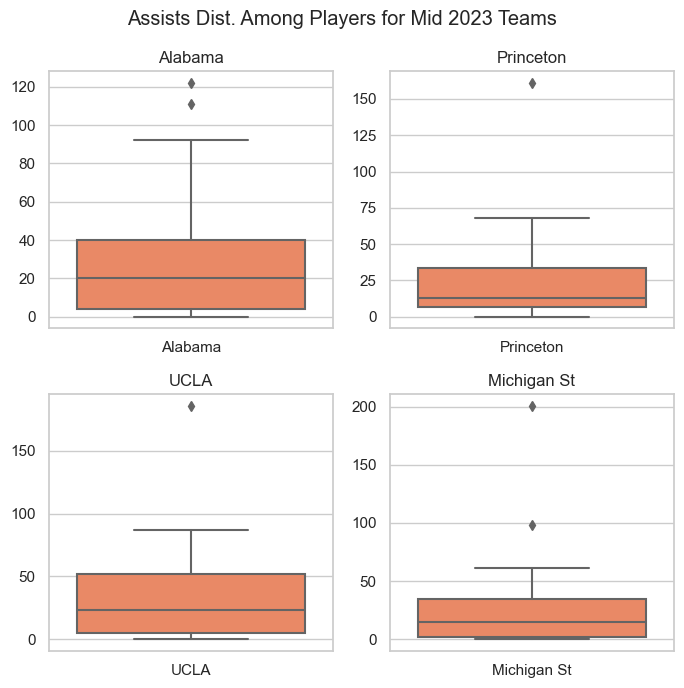

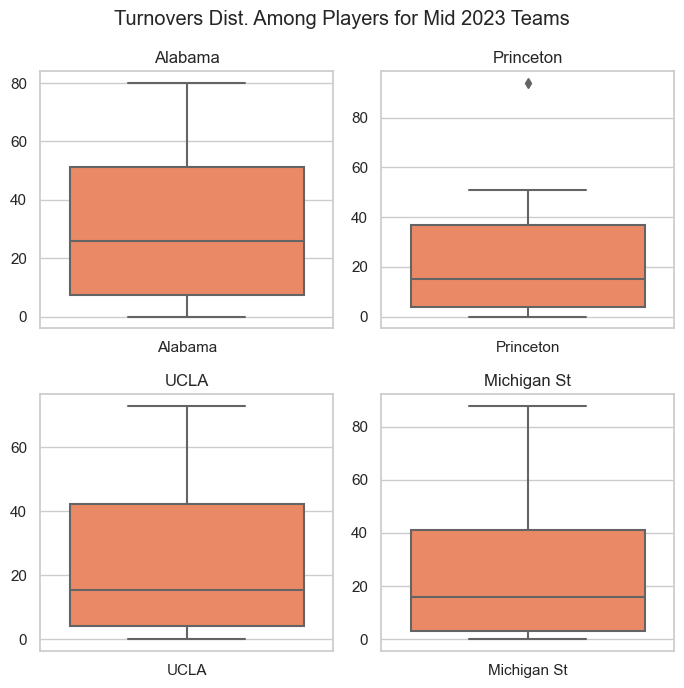

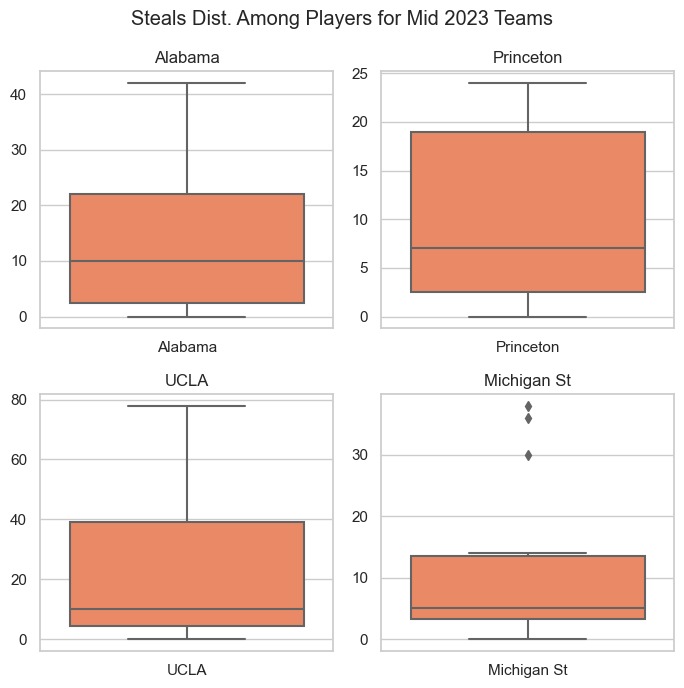

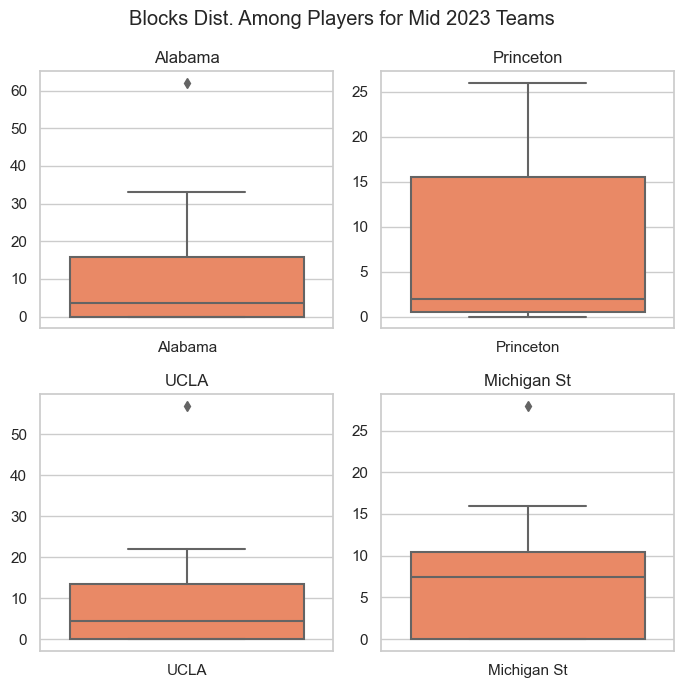

In [30]:
make_boxplots(filtered_df_mid_23,mid_teams_2023,stats,'Mid 2023','coral')